In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import kclique
import community as community_louvain

In [2]:
COLORS = ['magenta', 'orange', 'blue', 'darkred', 'darkcyan', 'lime', 'green', 'gold',
          'darkviolet', 'aqua', 'sienna', 'olive', 'deepskyblue', 'salmon', 'mediumseagreen', 'red', 
          'orangered', 'violet', 'darkslategrey', 'deeppink', 'deepskyblue', 'brown', 'black', 'tan',
          'tomato', 'rosybrown', 'turquoise', 'purple', 'palevioletred', 'crimson', 'indianred', 'silver']

In [3]:
G_total = nx.Graph()
nodes = dict()
colors = []

In [4]:
def add_edges(node, c):
    edges = np.genfromtxt("facebook/" + str(node) + ".edges", delimiter=' ')
    G = nx.Graph()
    for e in edges:
        nodes[e[0]] = c
        nodes[e[1]] = c
        G_total.add_edge(e[0], e[1])
        G.add_edge(e[0], e[1])
        
    print("Node " + str(node) + ":")
    print("number of nodes: ", G.number_of_nodes())
    print("number of edges: ", G.number_of_edges(), "\n")
    return G
    

def avg_circle(node):
    f = open("facebook/" + str(node) + ".circles", "r")
    circles_list = [len(i.split('\t'))-1 for i in f.readlines() if len(i.split('\t')) > 2]
    return sorted(circles_list)[len(circles_list)//4]


def community_dict(com, G):
    com_dict = dict()
    for i in range(len(com)):
        for n in com[i]:
            com_dict[n] = i
    return com_dict


def color_map(com_dict, G):      
    res = []
    for n in G:
        if n in com_dict:
            res.append(COLORS[com_dict[n]%len(COLORS)])
        else:
            res.append(COLORS[-1])
    return res

In [5]:
circles = [0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980]

In [6]:
graphs = [add_edges(circles[i], i) for i in range(len(circles))]

Node 0:
number of nodes:  333
number of edges:  2519 

Node 107:
number of nodes:  1034
number of edges:  26749 

Node 348:
number of nodes:  224
number of edges:  3192 

Node 414:
number of nodes:  150
number of edges:  1693 

Node 686:
number of nodes:  168
number of edges:  1656 

Node 698:
number of nodes:  61
number of edges:  270 

Node 1684:
number of nodes:  786
number of edges:  14024 

Node 1912:
number of nodes:  747
number of edges:  30025 

Node 3437:
number of nodes:  534
number of edges:  4813 

Node 3980:
number of nodes:  52
number of edges:  146 



In [10]:
for n in G_total:
    if n in nodes:
        colors.append(COLORS[nodes[n]])
    else:
        colors.append(COLORS[-1])

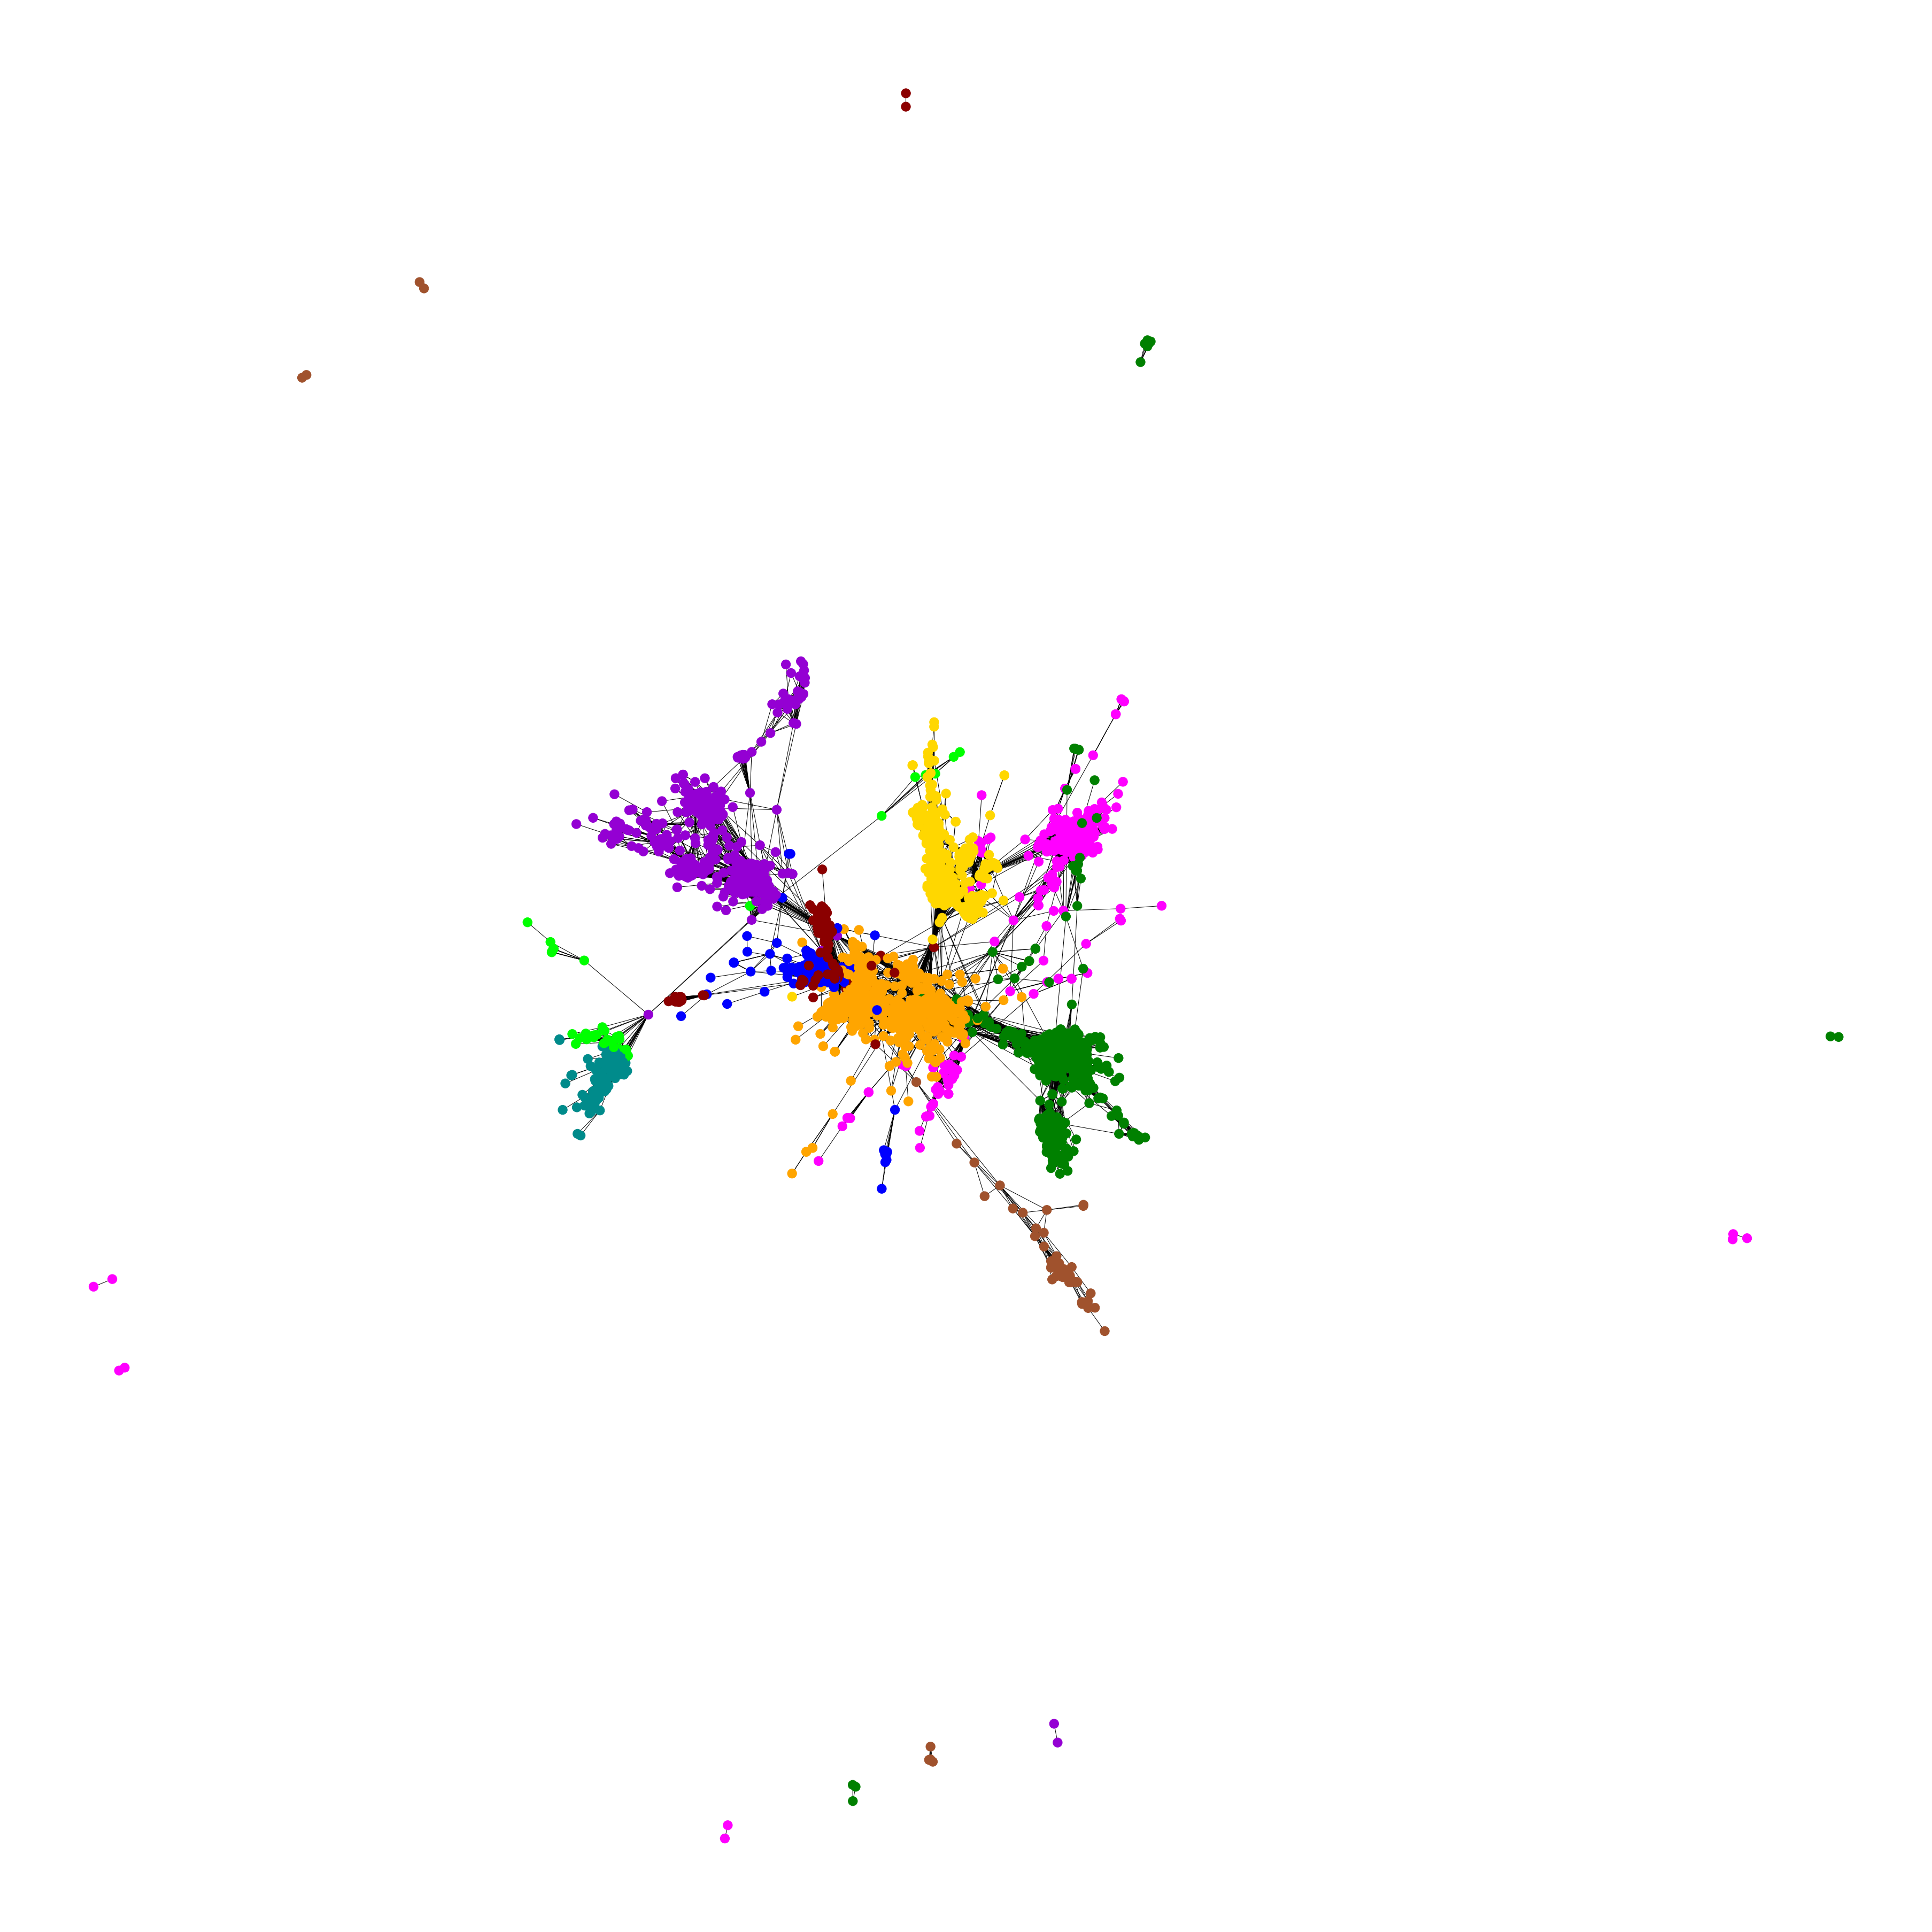

In [11]:
plt.figure(figsize=(50, 50))
nx.draw(G_total, node_color=colors)

In [9]:
def in_edges(com):
    return G_total.subgraph(com).number_of_edges()


def out_edges(com):
    count = 0
    for i, j in G_total.edges():
        if (i in com and j not in com) or (i not in com and j in com):
            count += 1
    return count


def conductance(in_num, out_num):
    return float(out_num) / (out_num + 2*in_num)
    

def internal_density(in_num, node_num):
    return float(in_num) / (node_num * float(node_num - 1) / 2)


def network_community_profile(graph, k):
    npc = []
    ids = []
    communities = list(nx.community.k_clique_communities(graph, k))
    for c in communities:
        in_num = in_edges(c)
        out_num = out_edges(c)
        npc.append(conductance(in_num, out_num))
        ids.append(internal_density(in_num, len(c)))
    return sorted(npc), ids


def plot_eval(graph):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    k_values = [2, 3, 4, 6, 7, 9]
    mins = []
    others = []
    npc_y = []
    
    avgs = []
    
    for k in k_values:
        npc, ids = network_community_profile(graph, k)
        mins.append(npc[0])
        avgs.append(float(sum(ids)) / len(ids))
        
        others.extend(npc[1:])
        npc_y.extend([k]*len(npc[1:]))
        
    ax[0].scatter(npc_y, others, c='silver', label='other values')
    ax[0].scatter(k_values, mins, c='r', label="min conductance value")
    ax[0].set(xlabel='k')
    ax[0].set_title("conductance")
    ax[0].legend()
    
    ax[1].scatter(k_values, avgs, c='b', label="average internal density")
    ax[1].set(xlabel='k')
    ax[1].set_title("internal density")
    ax[1].legend()

# Member-based community detection

## Node 0

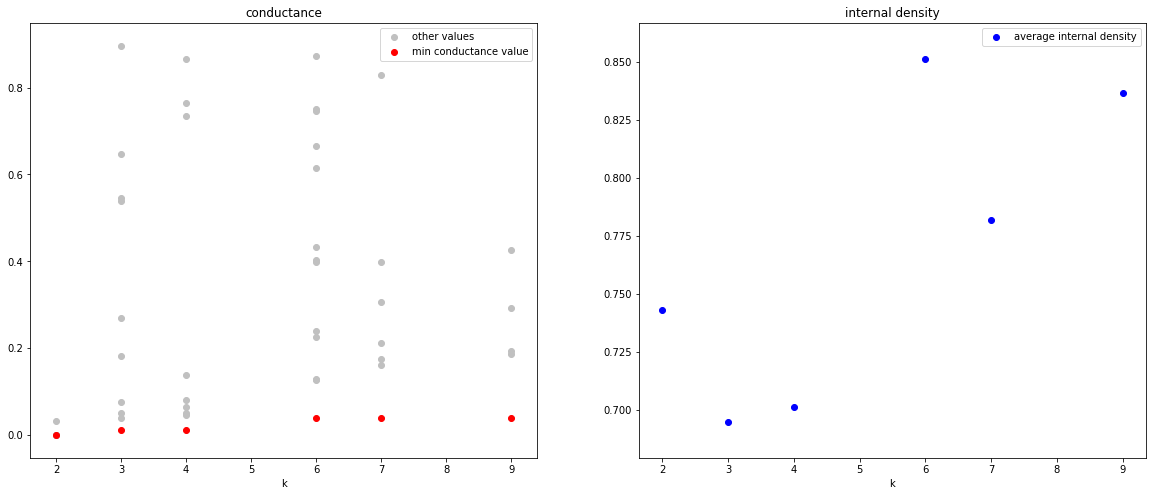

In [91]:
G0 = graphs[0]
plot_eval(G0)

In [94]:
communities0 = list(nx.community.k_clique_communities(G0, 2))
np.array(communities0).shape

(5,)

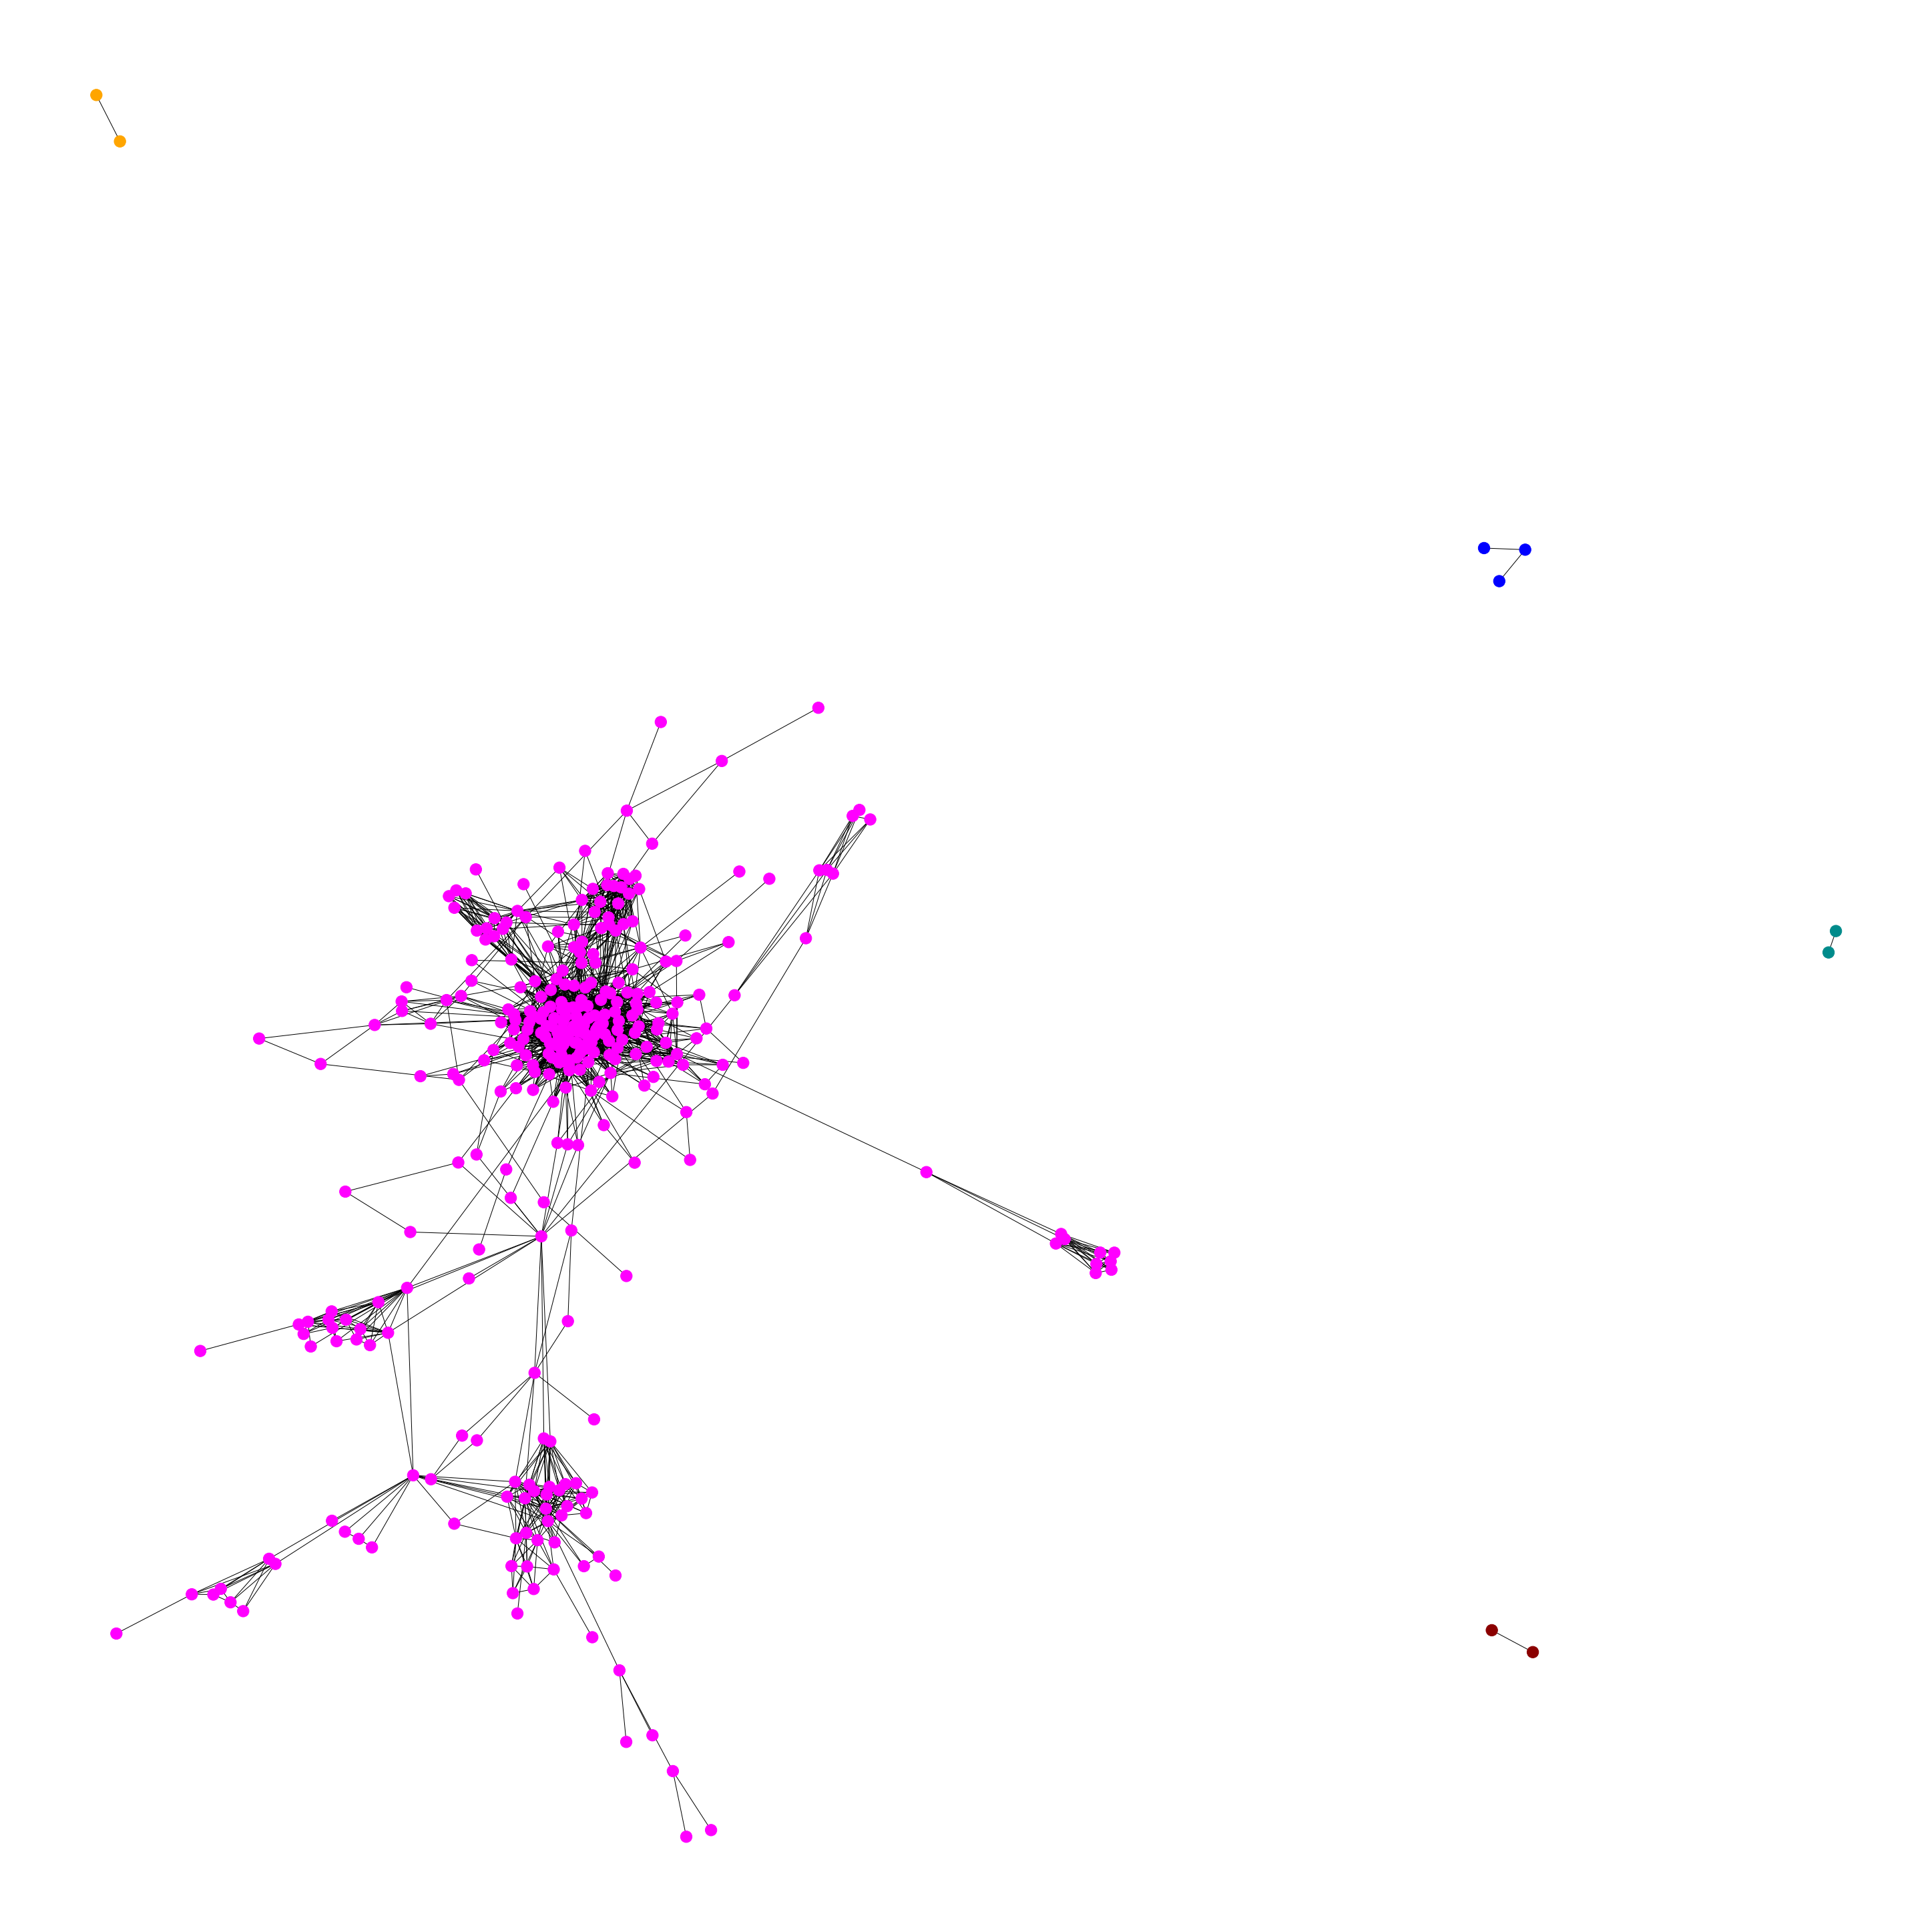

In [95]:
plt.figure(figsize=(40, 40))
nx.draw(G0, node_color=color_map(community_dict(communities0, G0), G0))

In [96]:
communities0 = list(nx.community.k_clique_communities(G0, 6))
np.array(communities0).shape

(13,)

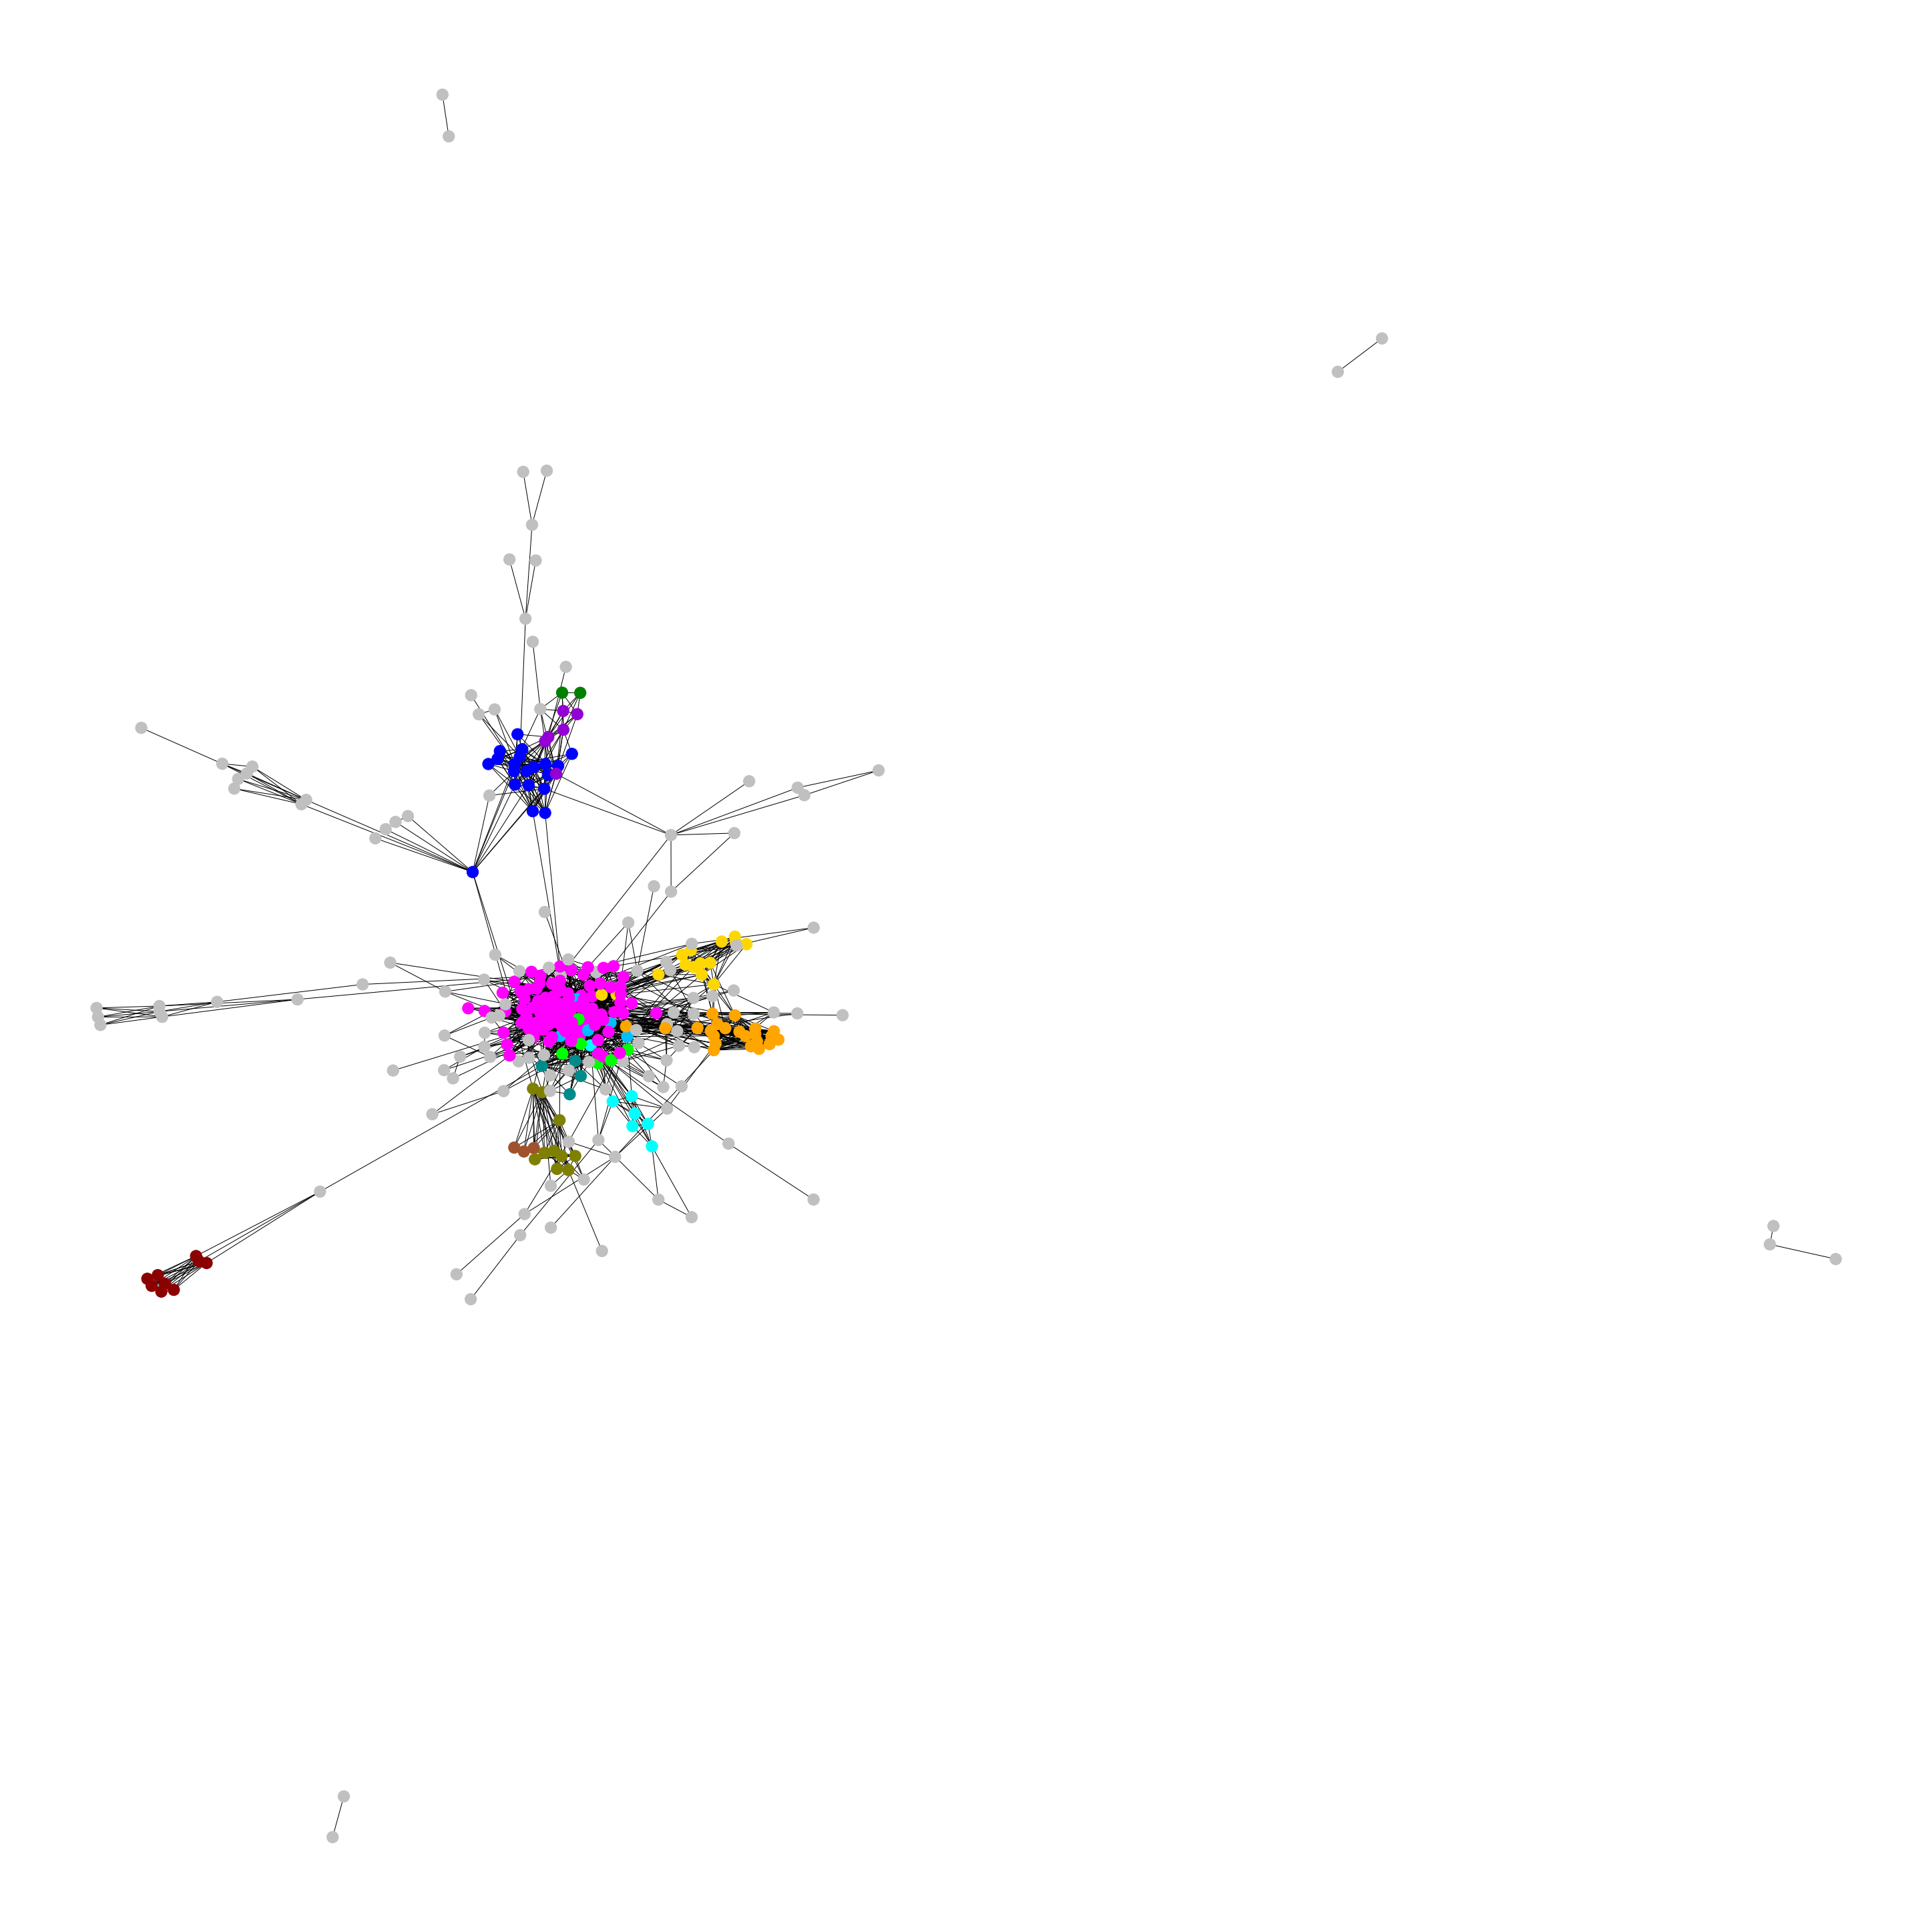

In [97]:
plt.figure(figsize=(40, 40))
nx.draw(G0, node_color=color_map(community_dict(communities0, G0), G0))

## Node 348

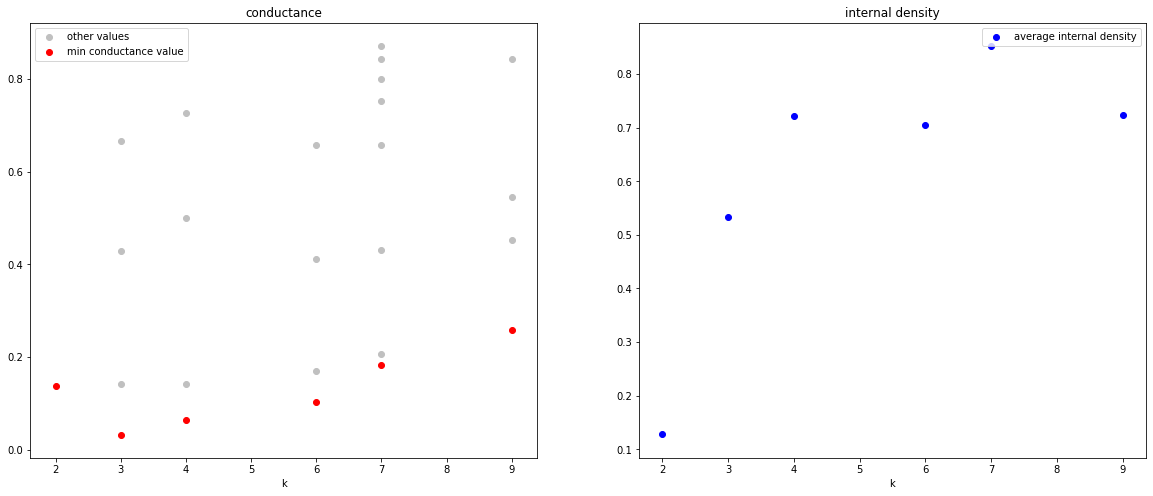

In [99]:
G348 = graphs[2]
plot_eval(G348)

In [102]:
communities348 = list(nx.community.k_clique_communities(G348, 3))
np.array(communities348).shape

(4,)

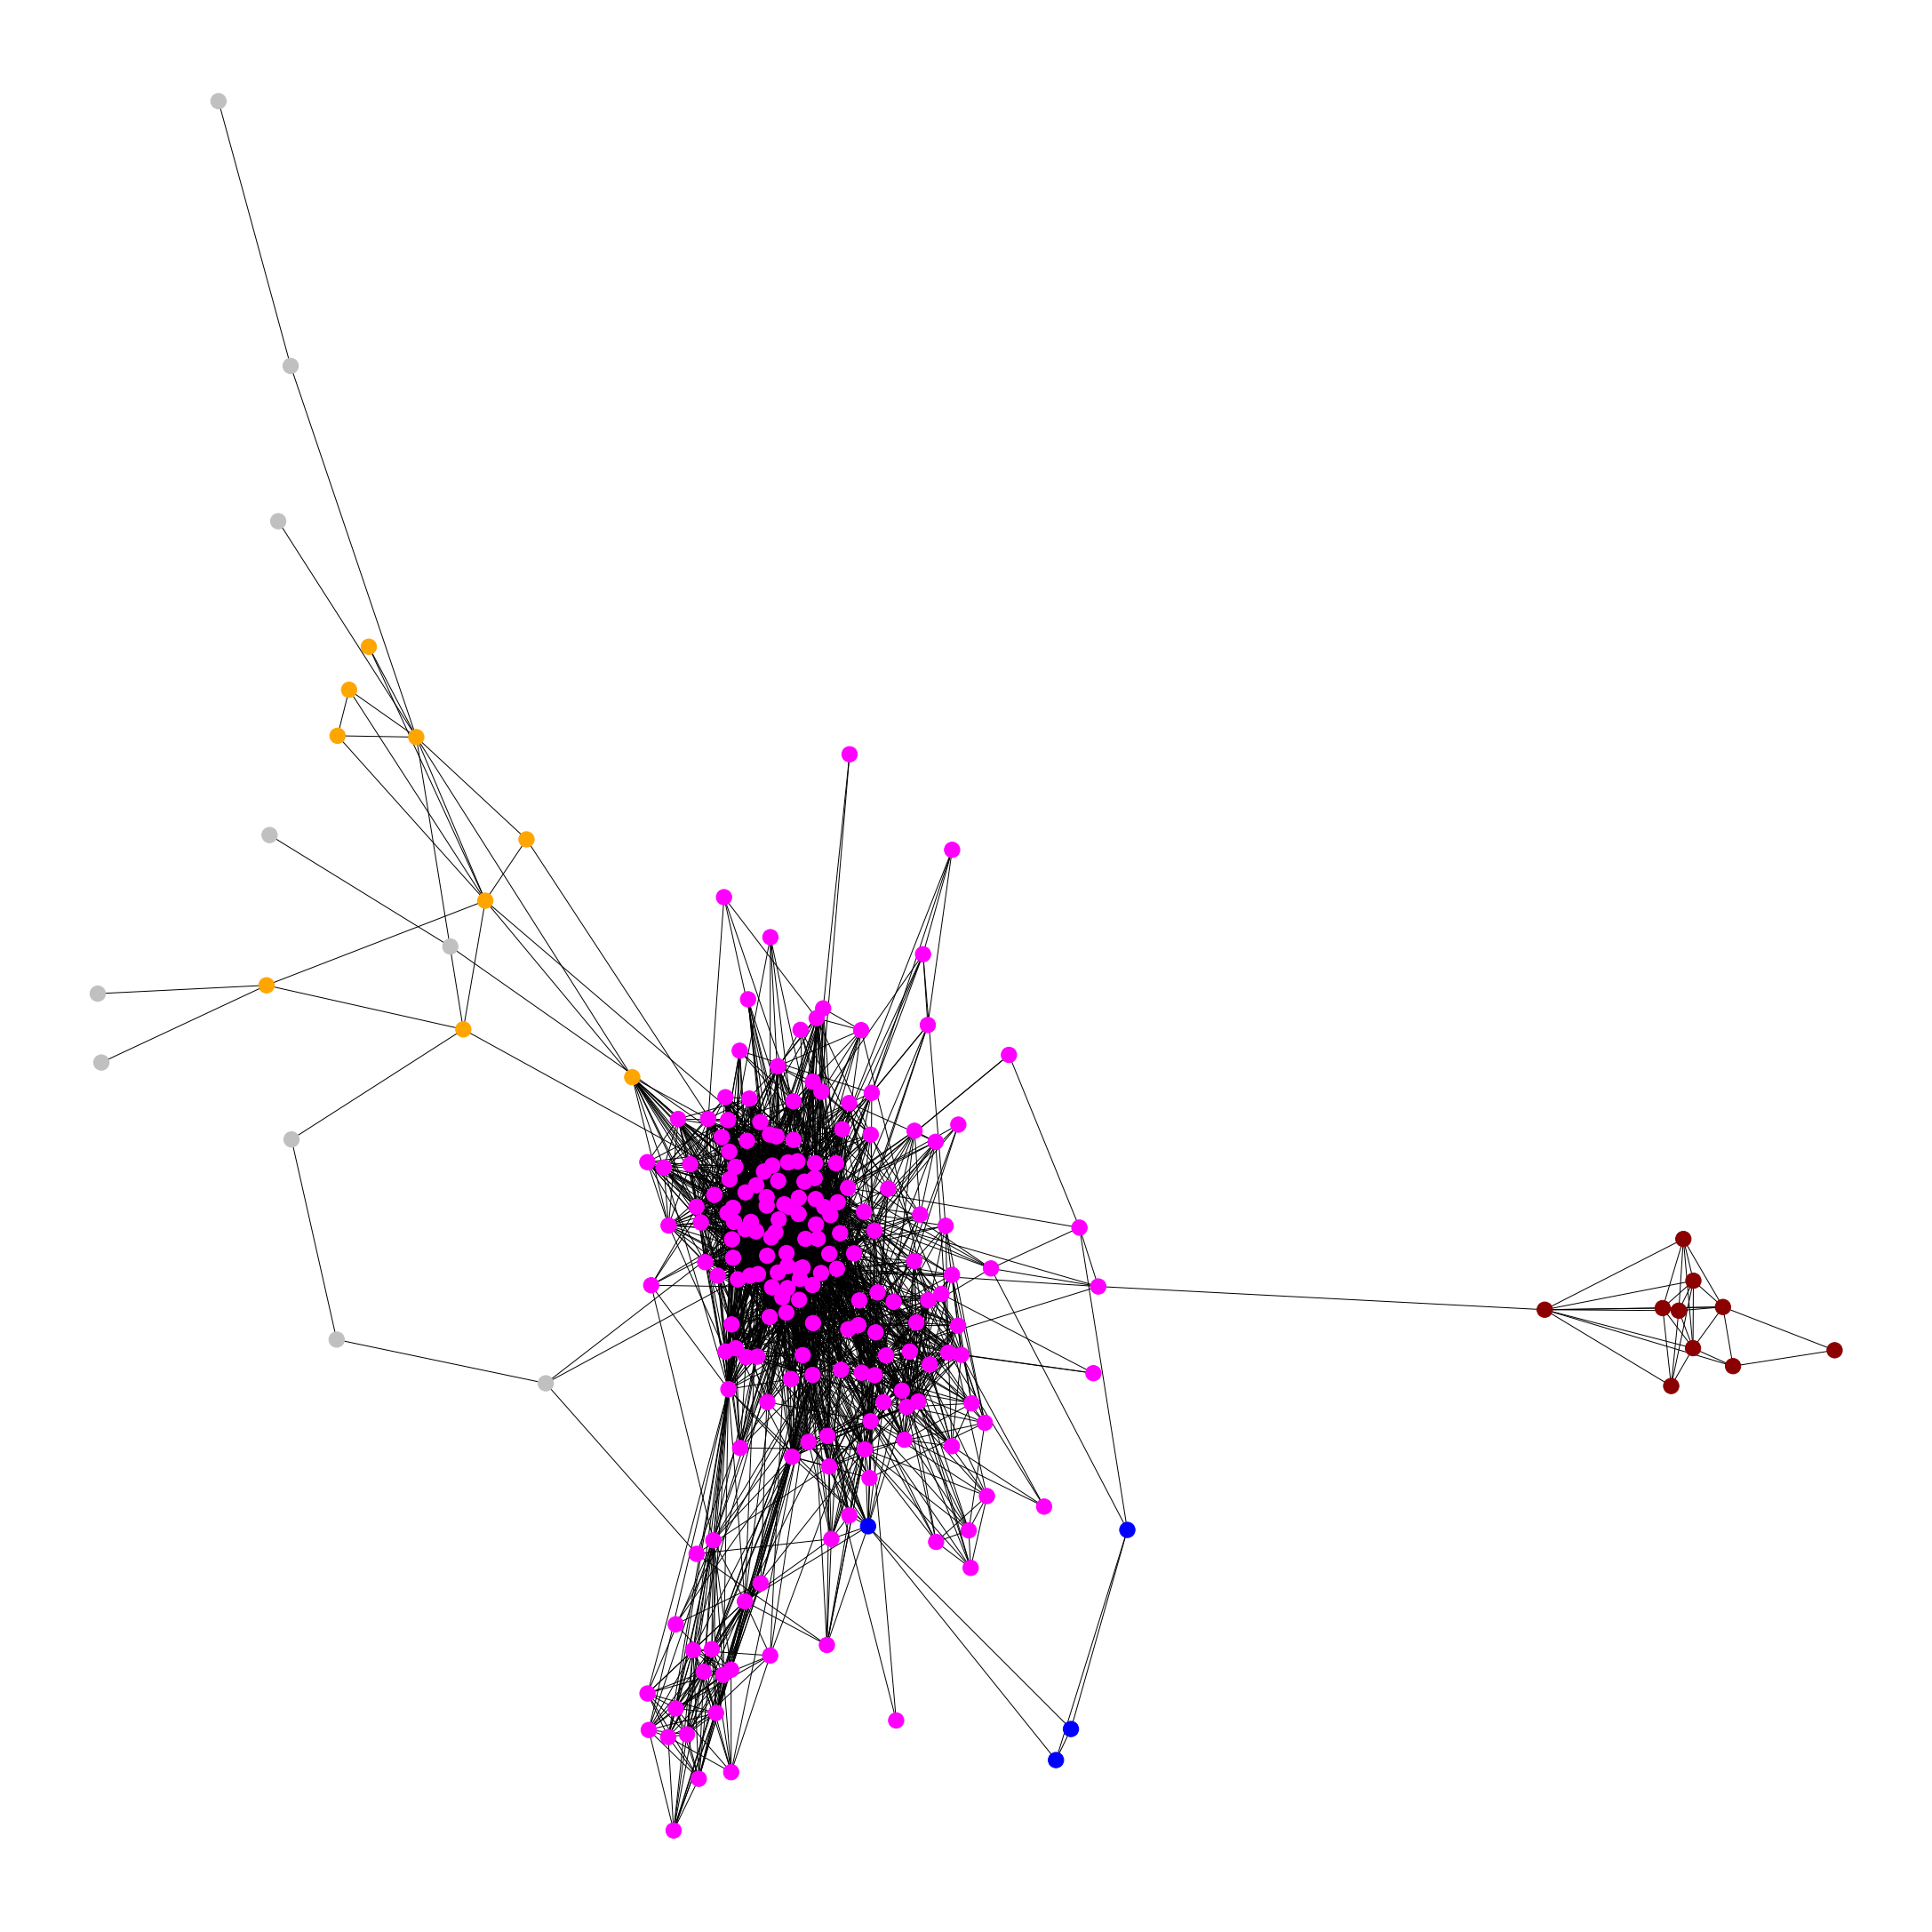

In [103]:
plt.figure(figsize=(30, 30))
nx.draw(G348, node_color=color_map(community_dict(communities348, G348), G348))

In [106]:
communities348 = list(nx.community.k_clique_communities(G348, 7))
np.array(communities348).shape

(8,)

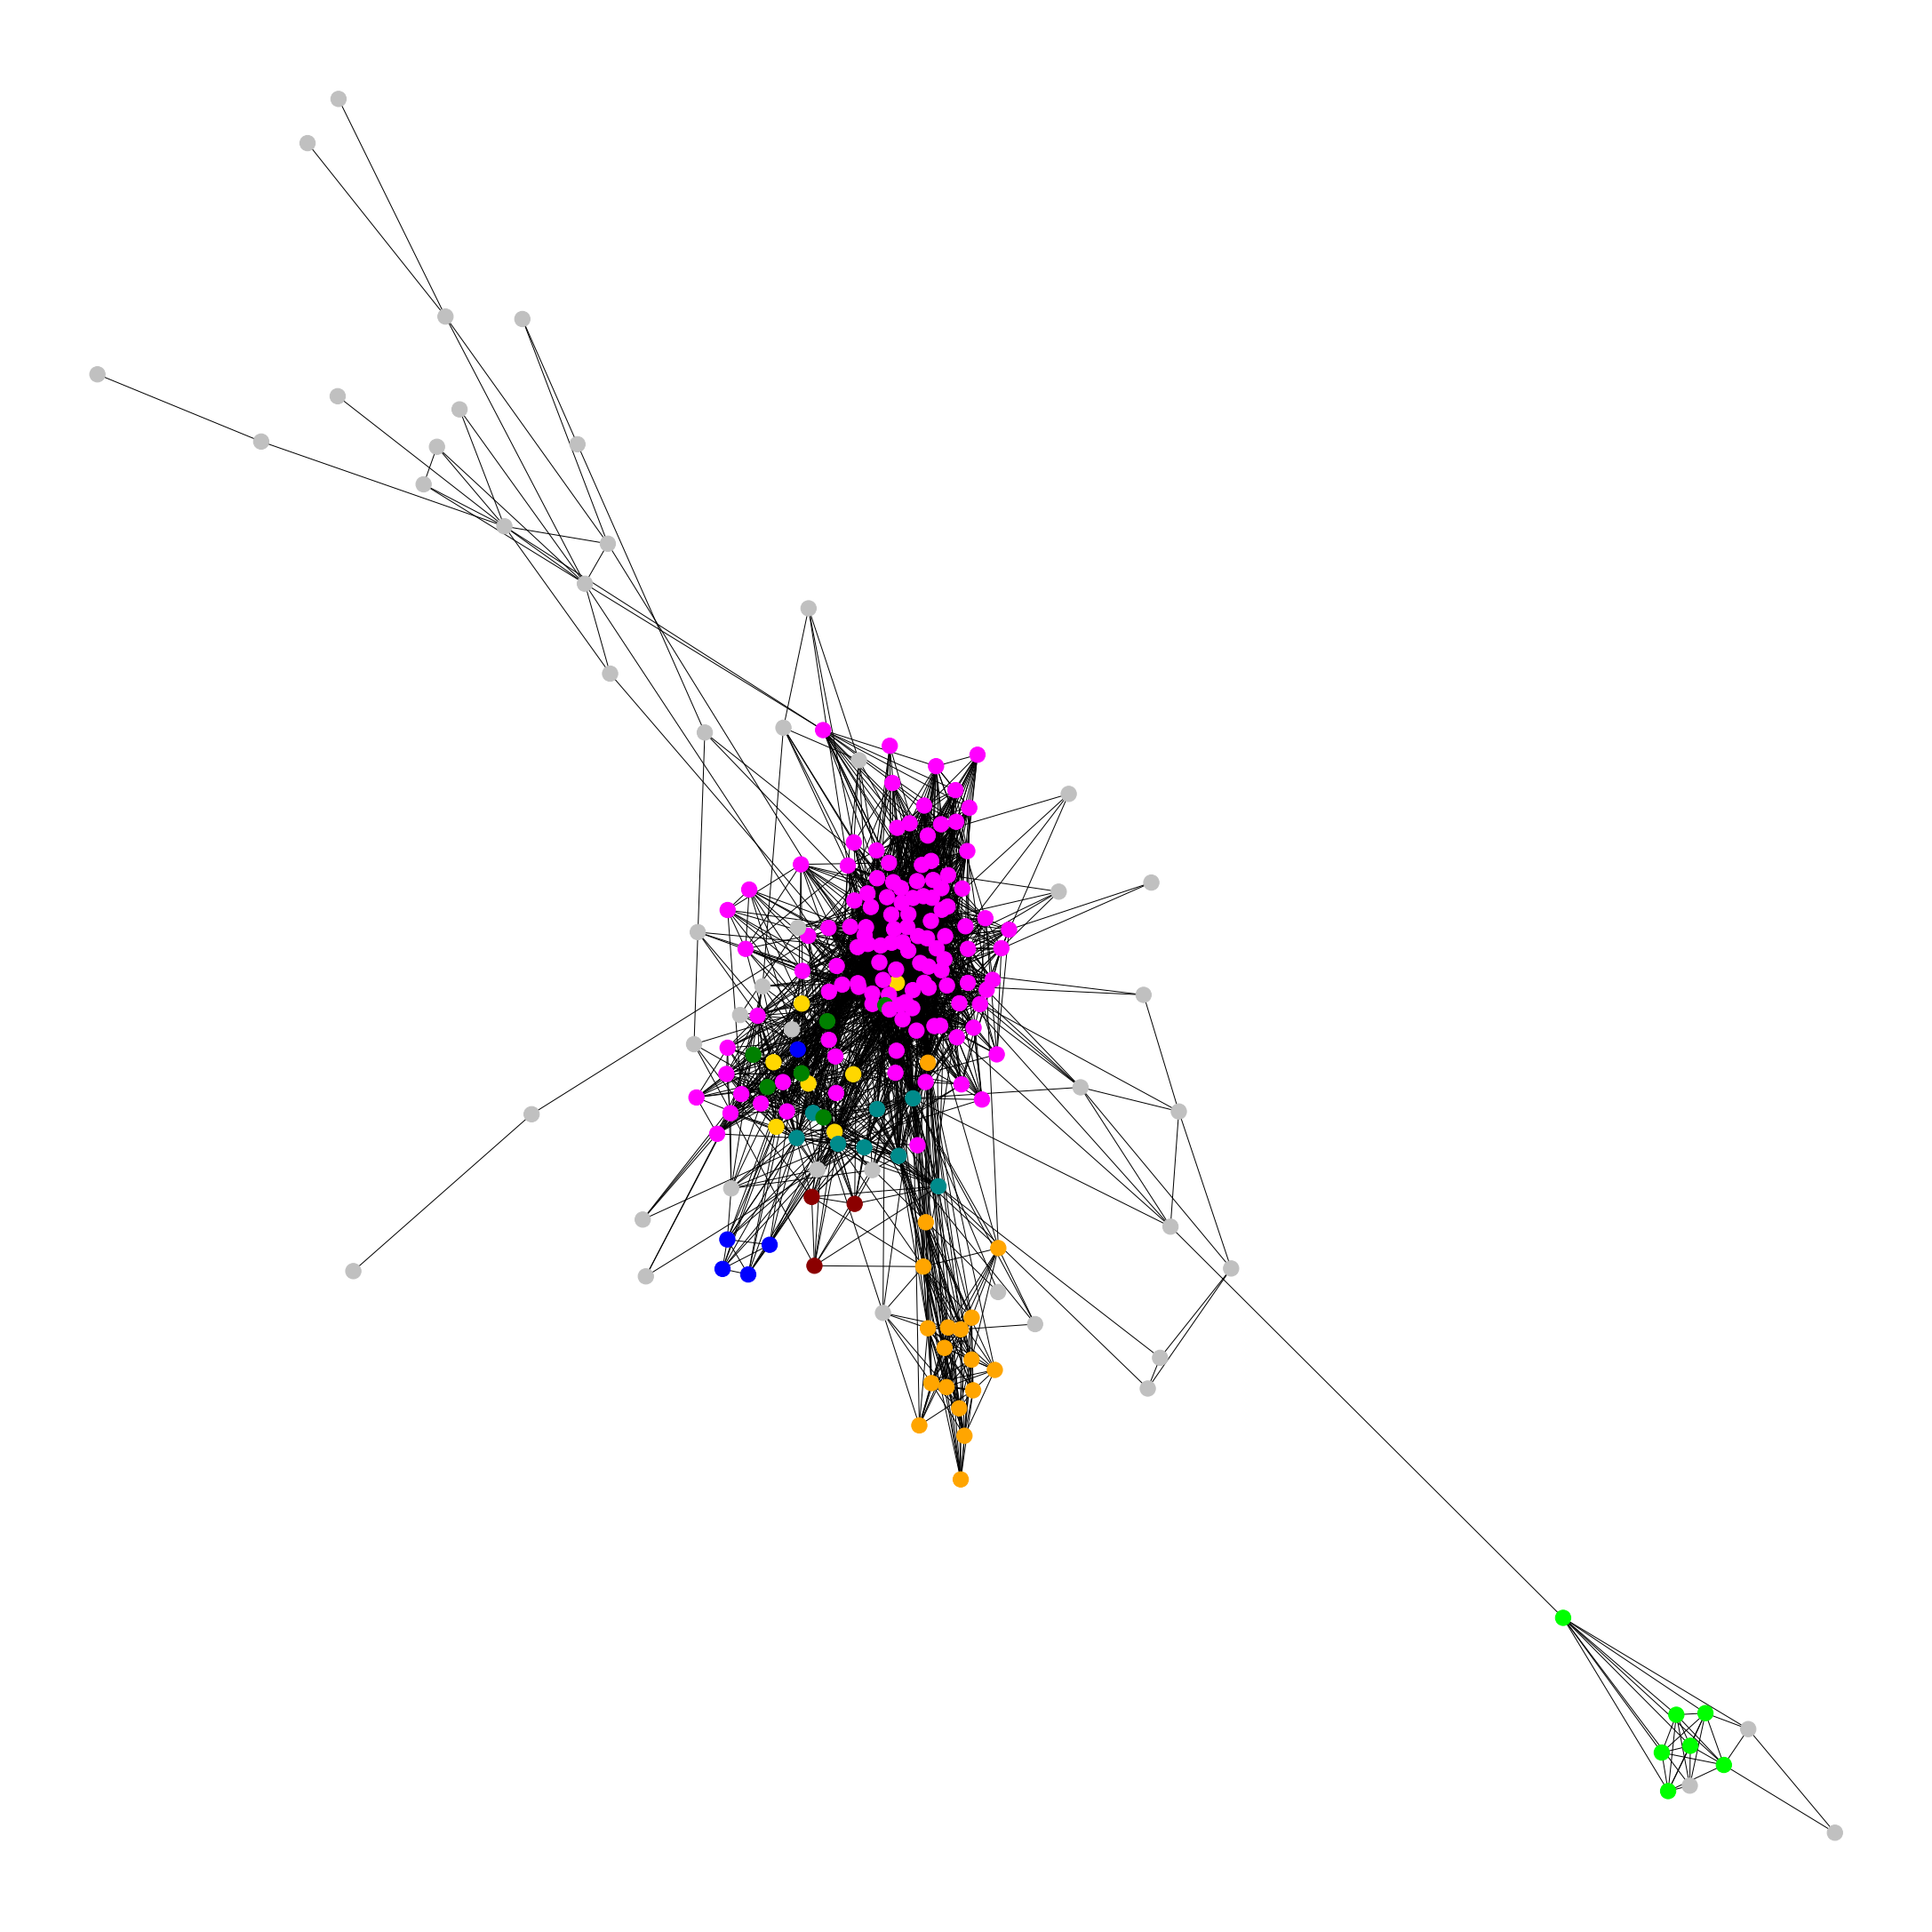

In [108]:
plt.figure(figsize=(30, 30))
nx.draw(G348, node_color=color_map(community_dict(communities348, G348), G348))

## Node 414

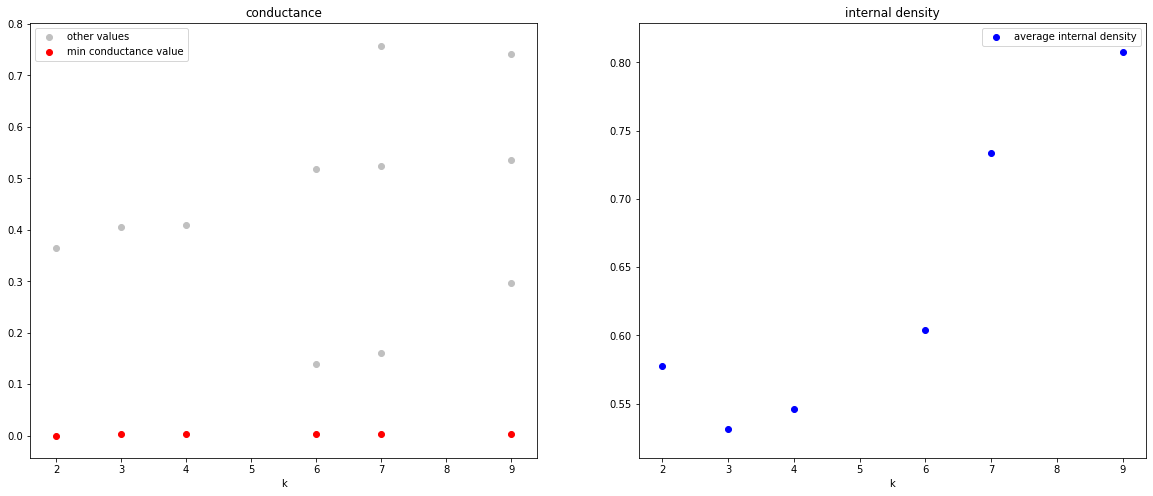

In [109]:
G414 = graphs[3]
plot_eval(G414)

In [110]:
communities414 = list(nx.community.k_clique_communities(G414, 9))
np.array(communities414).shape

(4,)

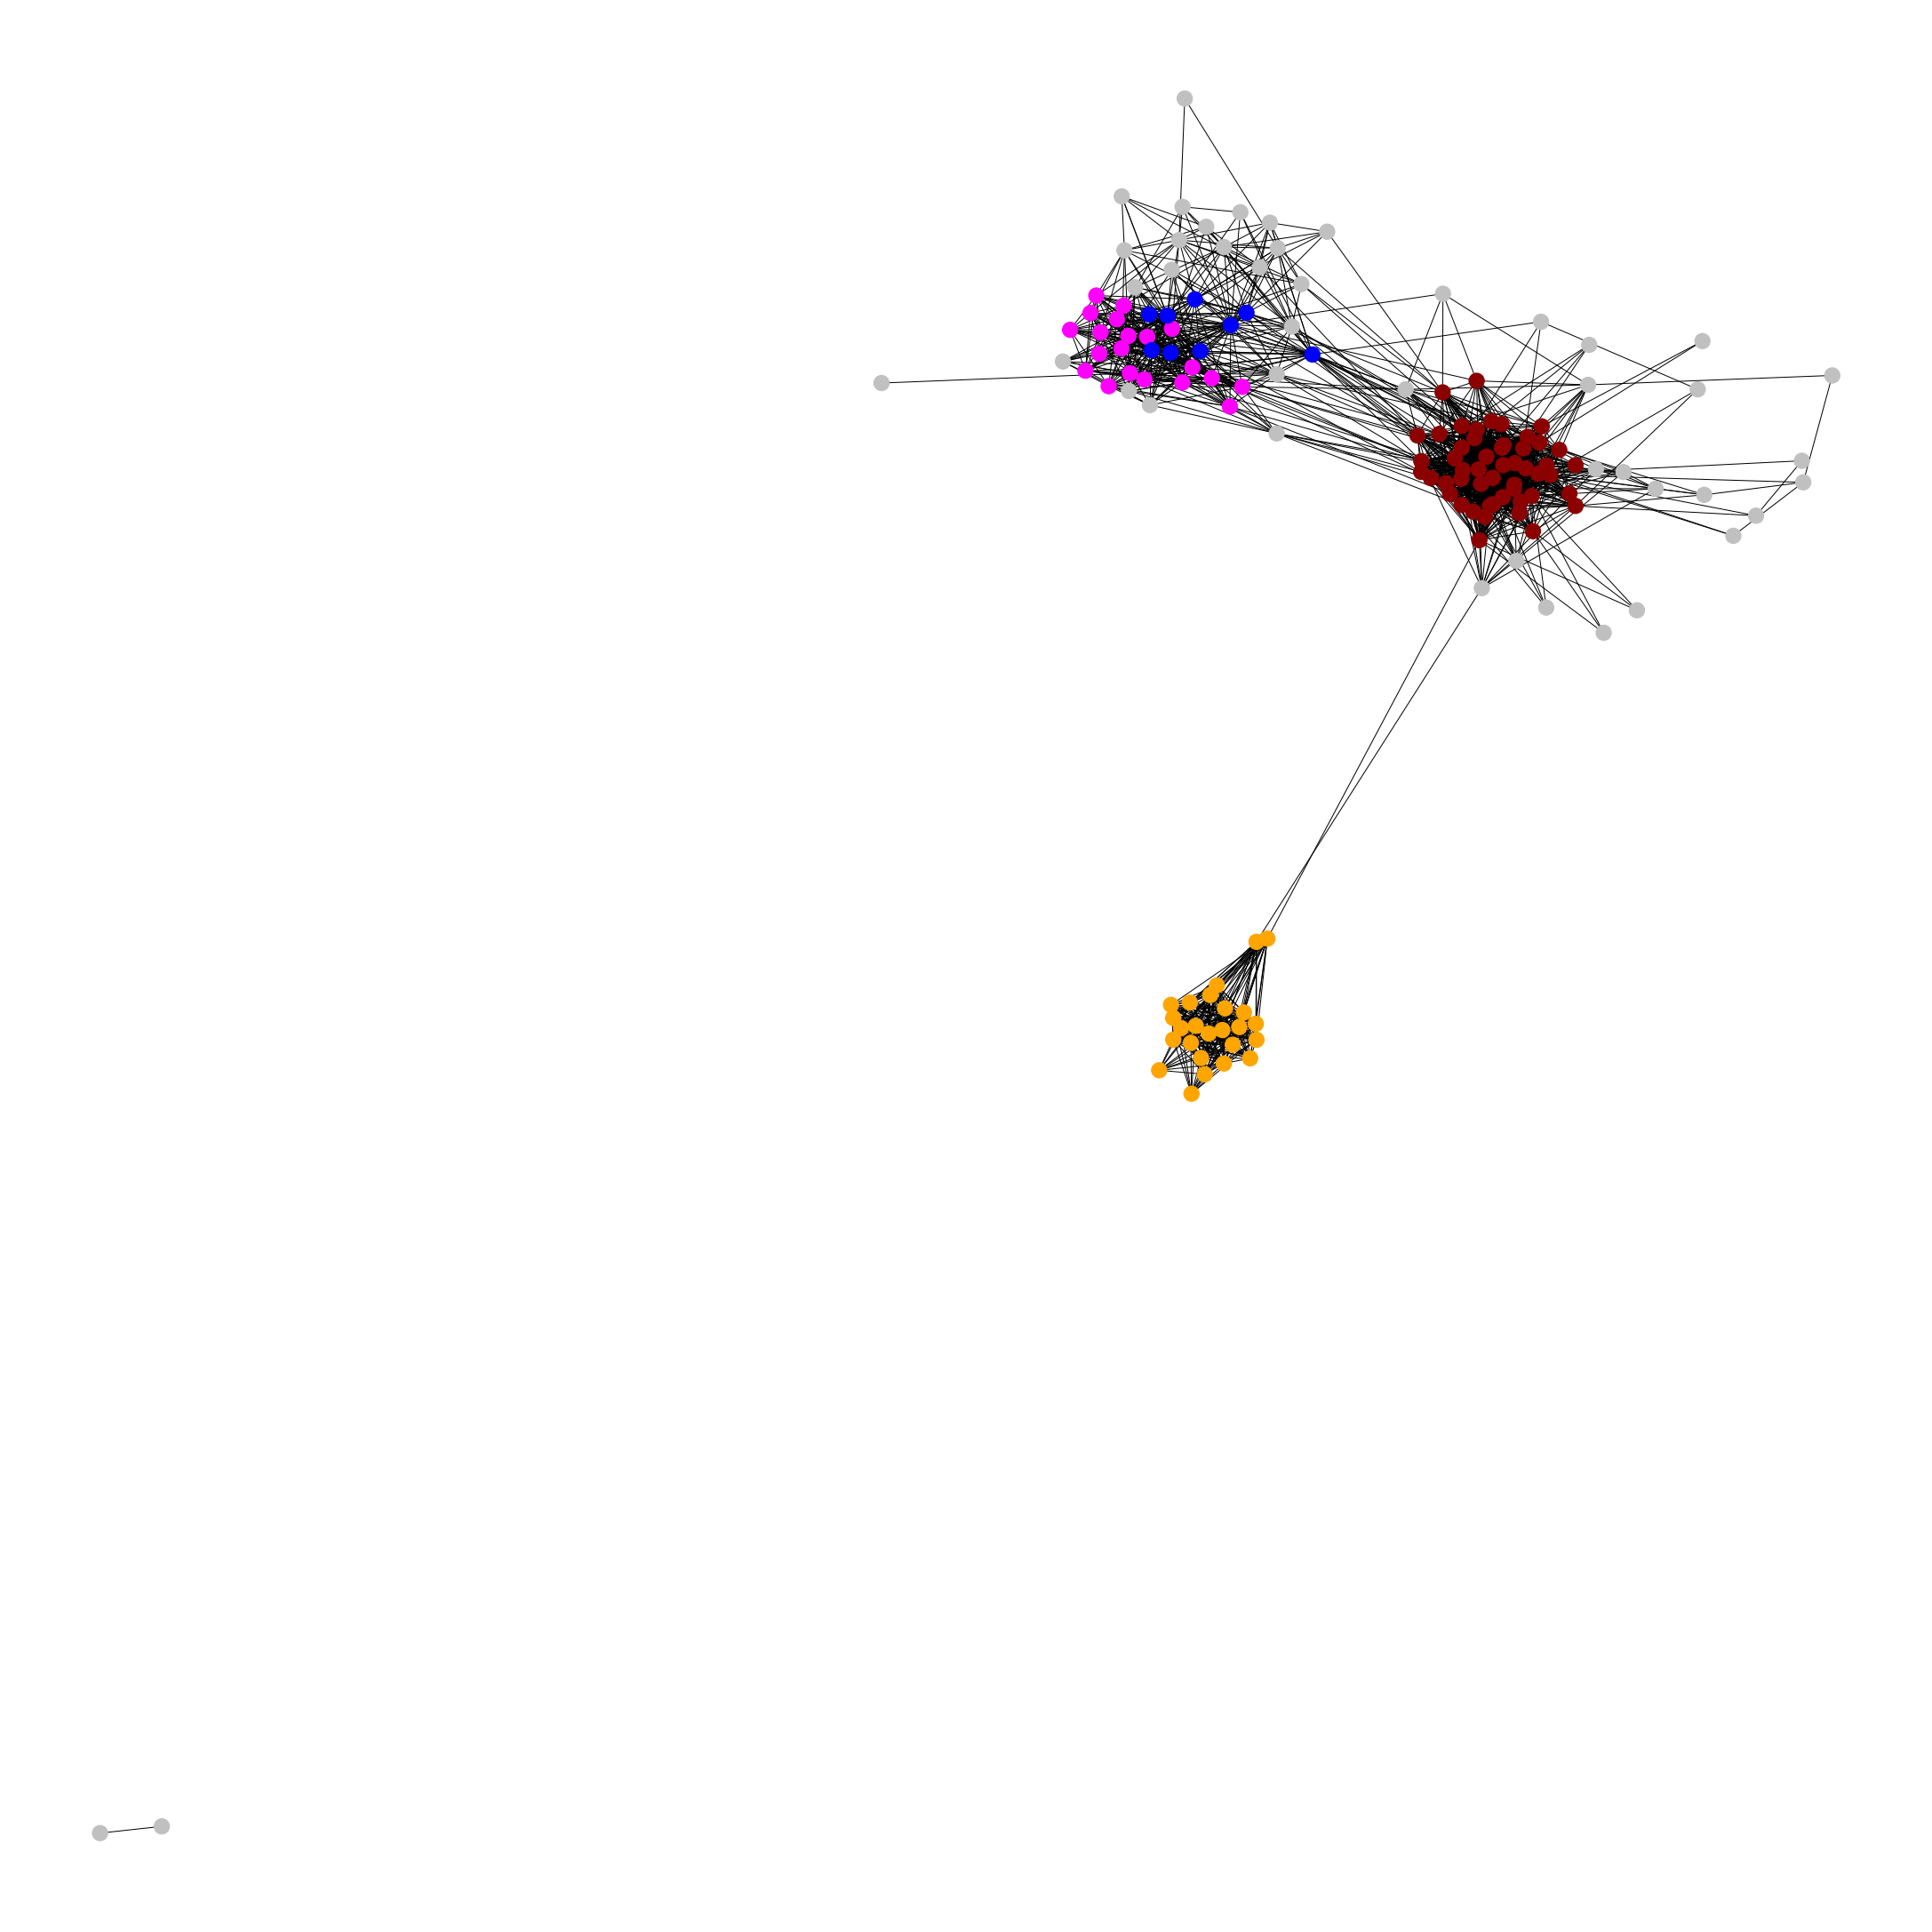

In [111]:
plt.figure(figsize=(30, 30))
nx.draw(G414, node_color=color_map(community_dict(communities414, G414), G414))

## Node 686

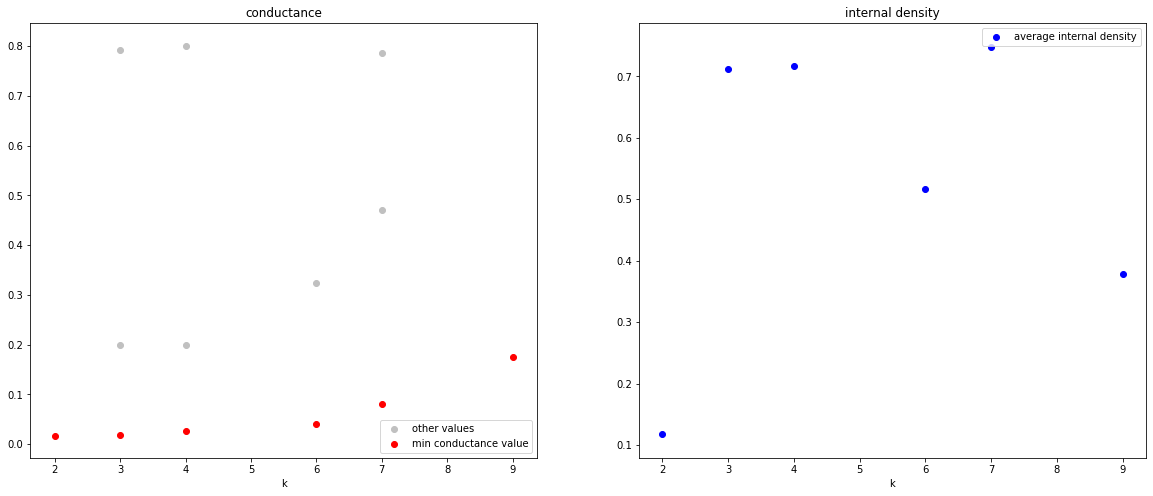

In [10]:
G686 = graphs[4]
plot_eval(G686)

In [11]:
communities686 = list(nx.community.k_clique_communities(G686, 2))
np.array(communities686).shape

(1,)

In [115]:
communities686 = list(nx.community.k_clique_communities(G686, 7))
np.array(communities686).shape

(3,)

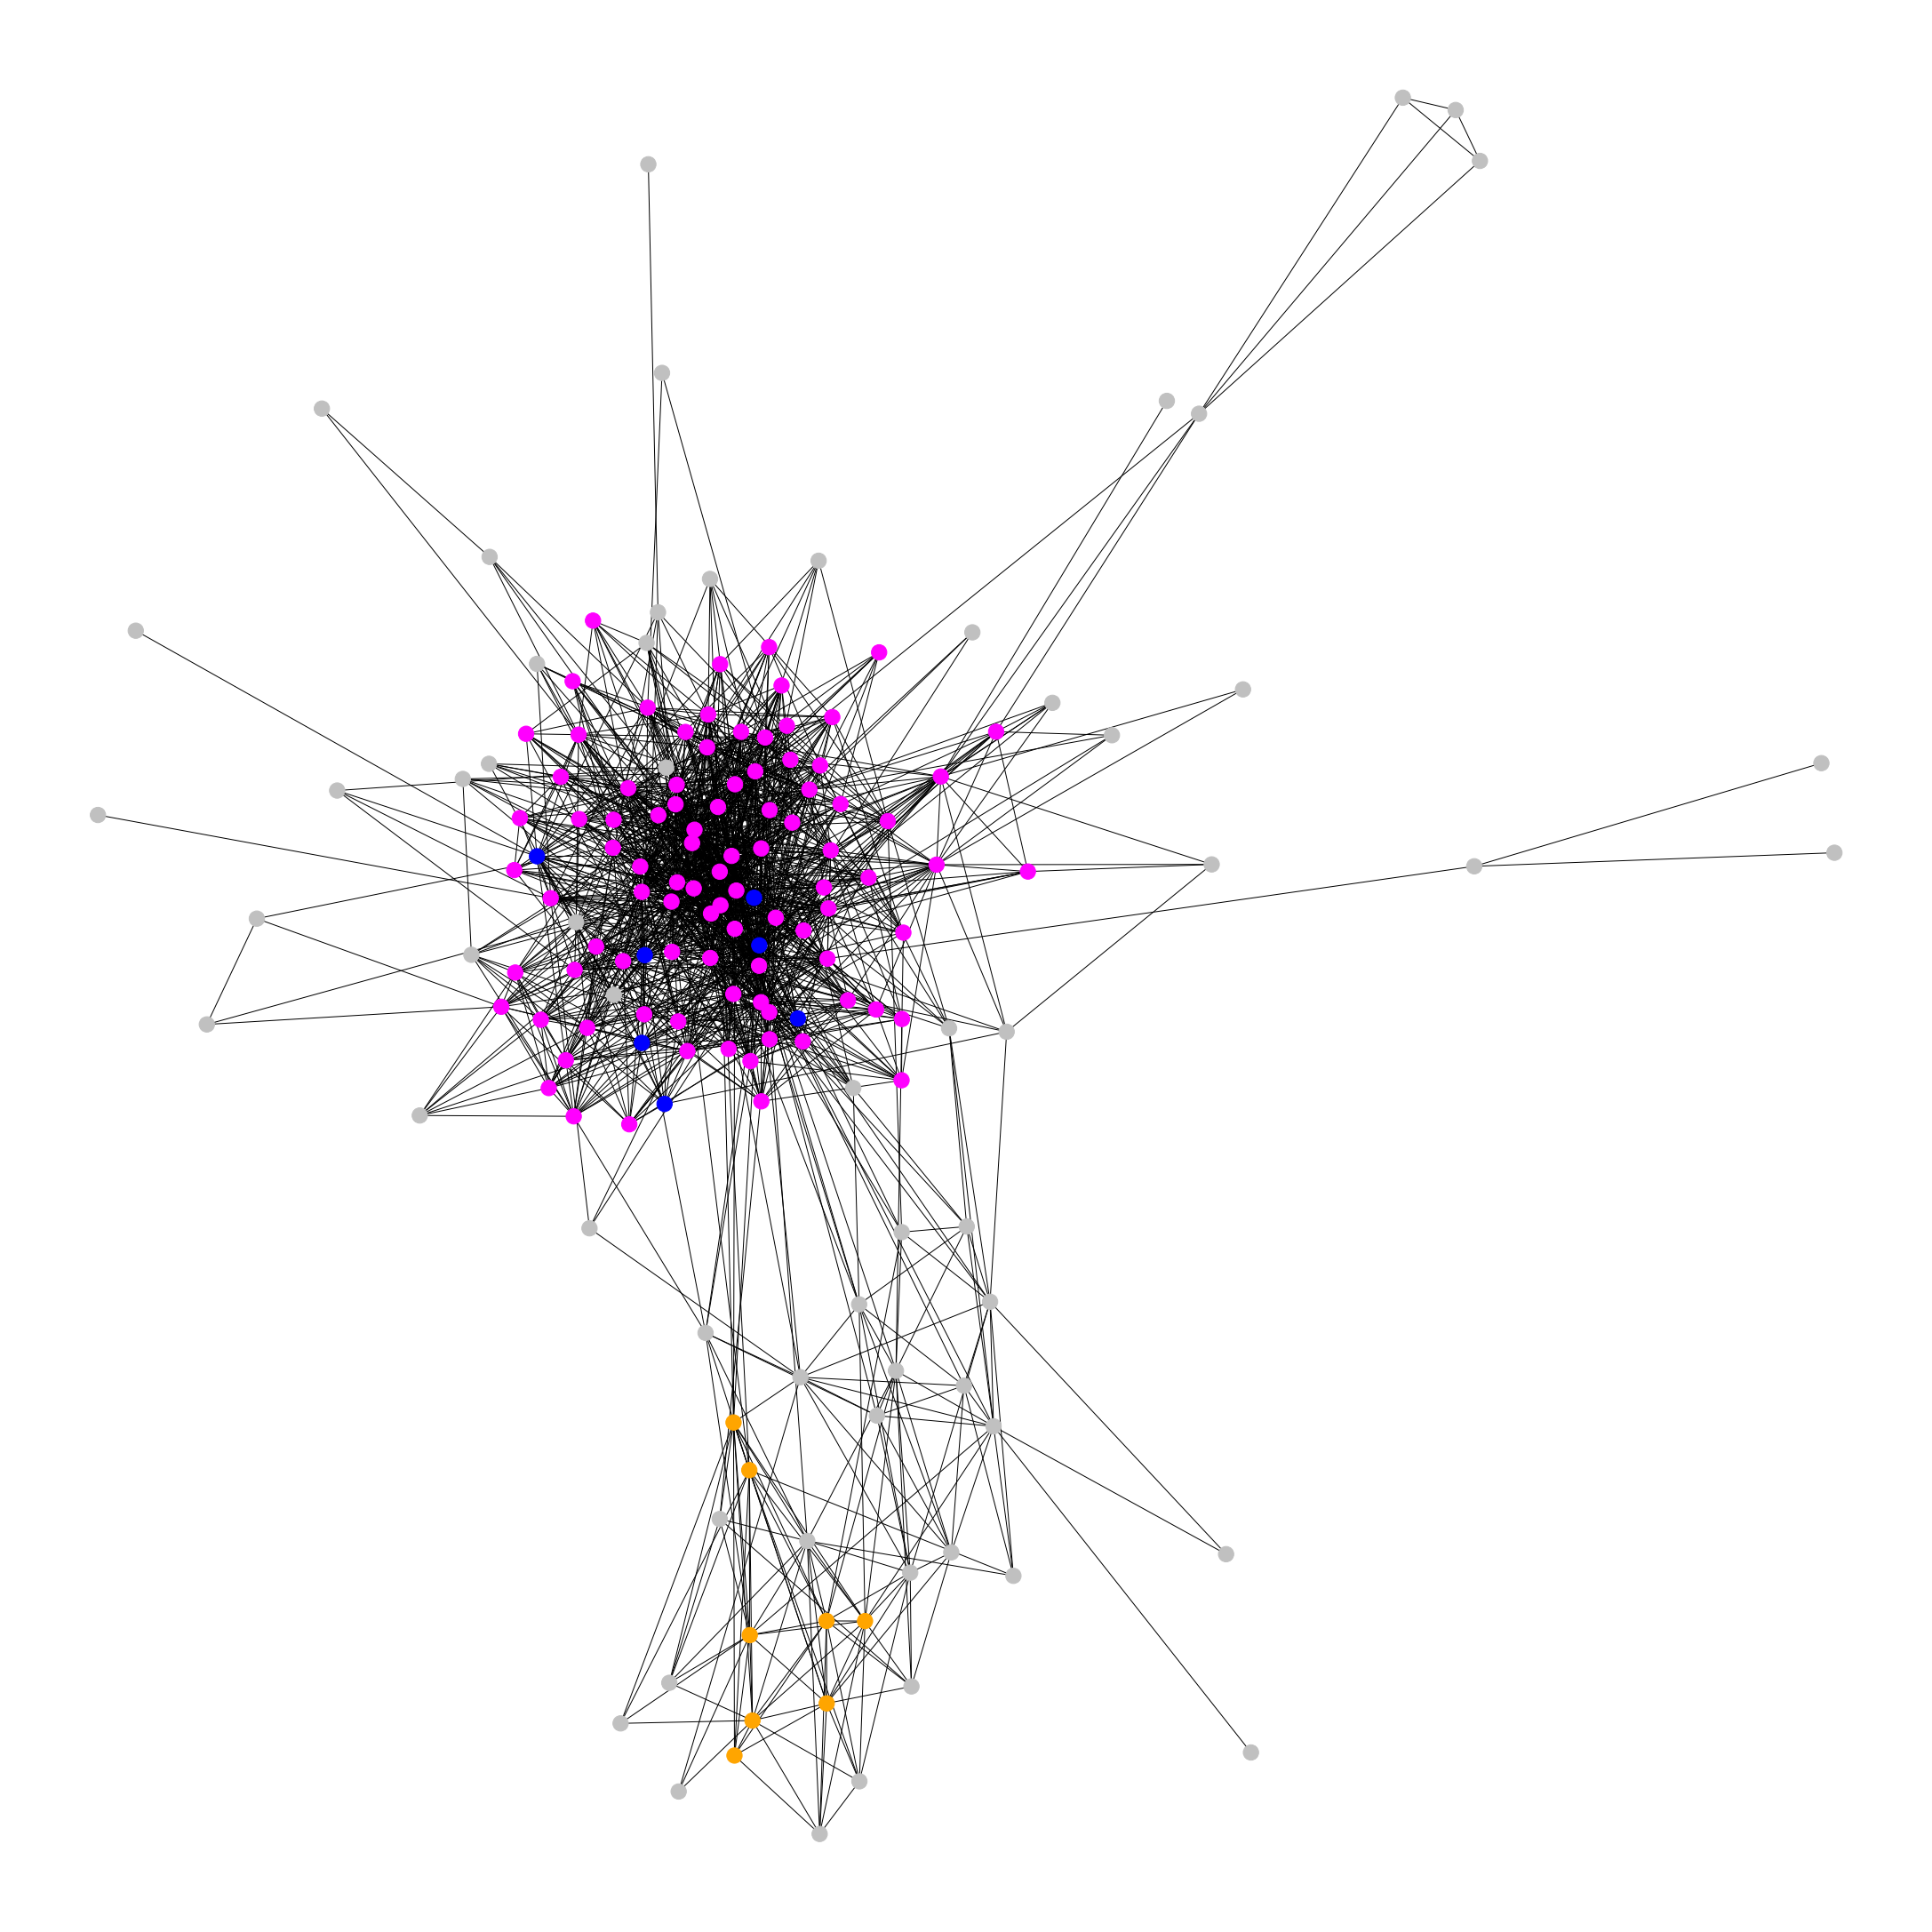

In [116]:
plt.figure(figsize=(30, 30))
nx.draw(G686, node_color=color_map(community_dict(communities686, G686), G686))

## Node 698

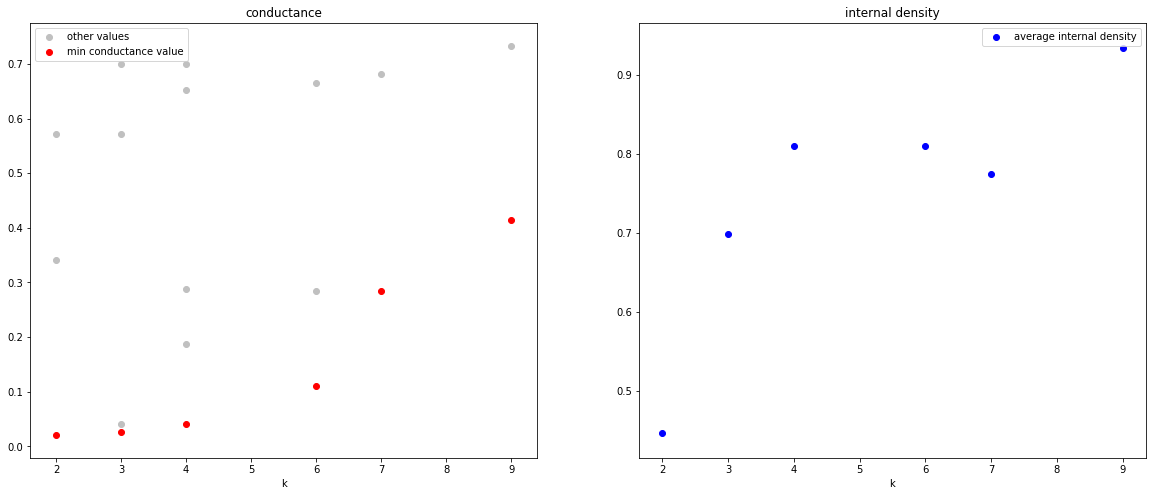

In [117]:
G698 = graphs[5]
plot_eval(G698)

In [118]:
communities698 = list(nx.community.k_clique_communities(G698, 2))
np.array(communities698).shape

(3,)

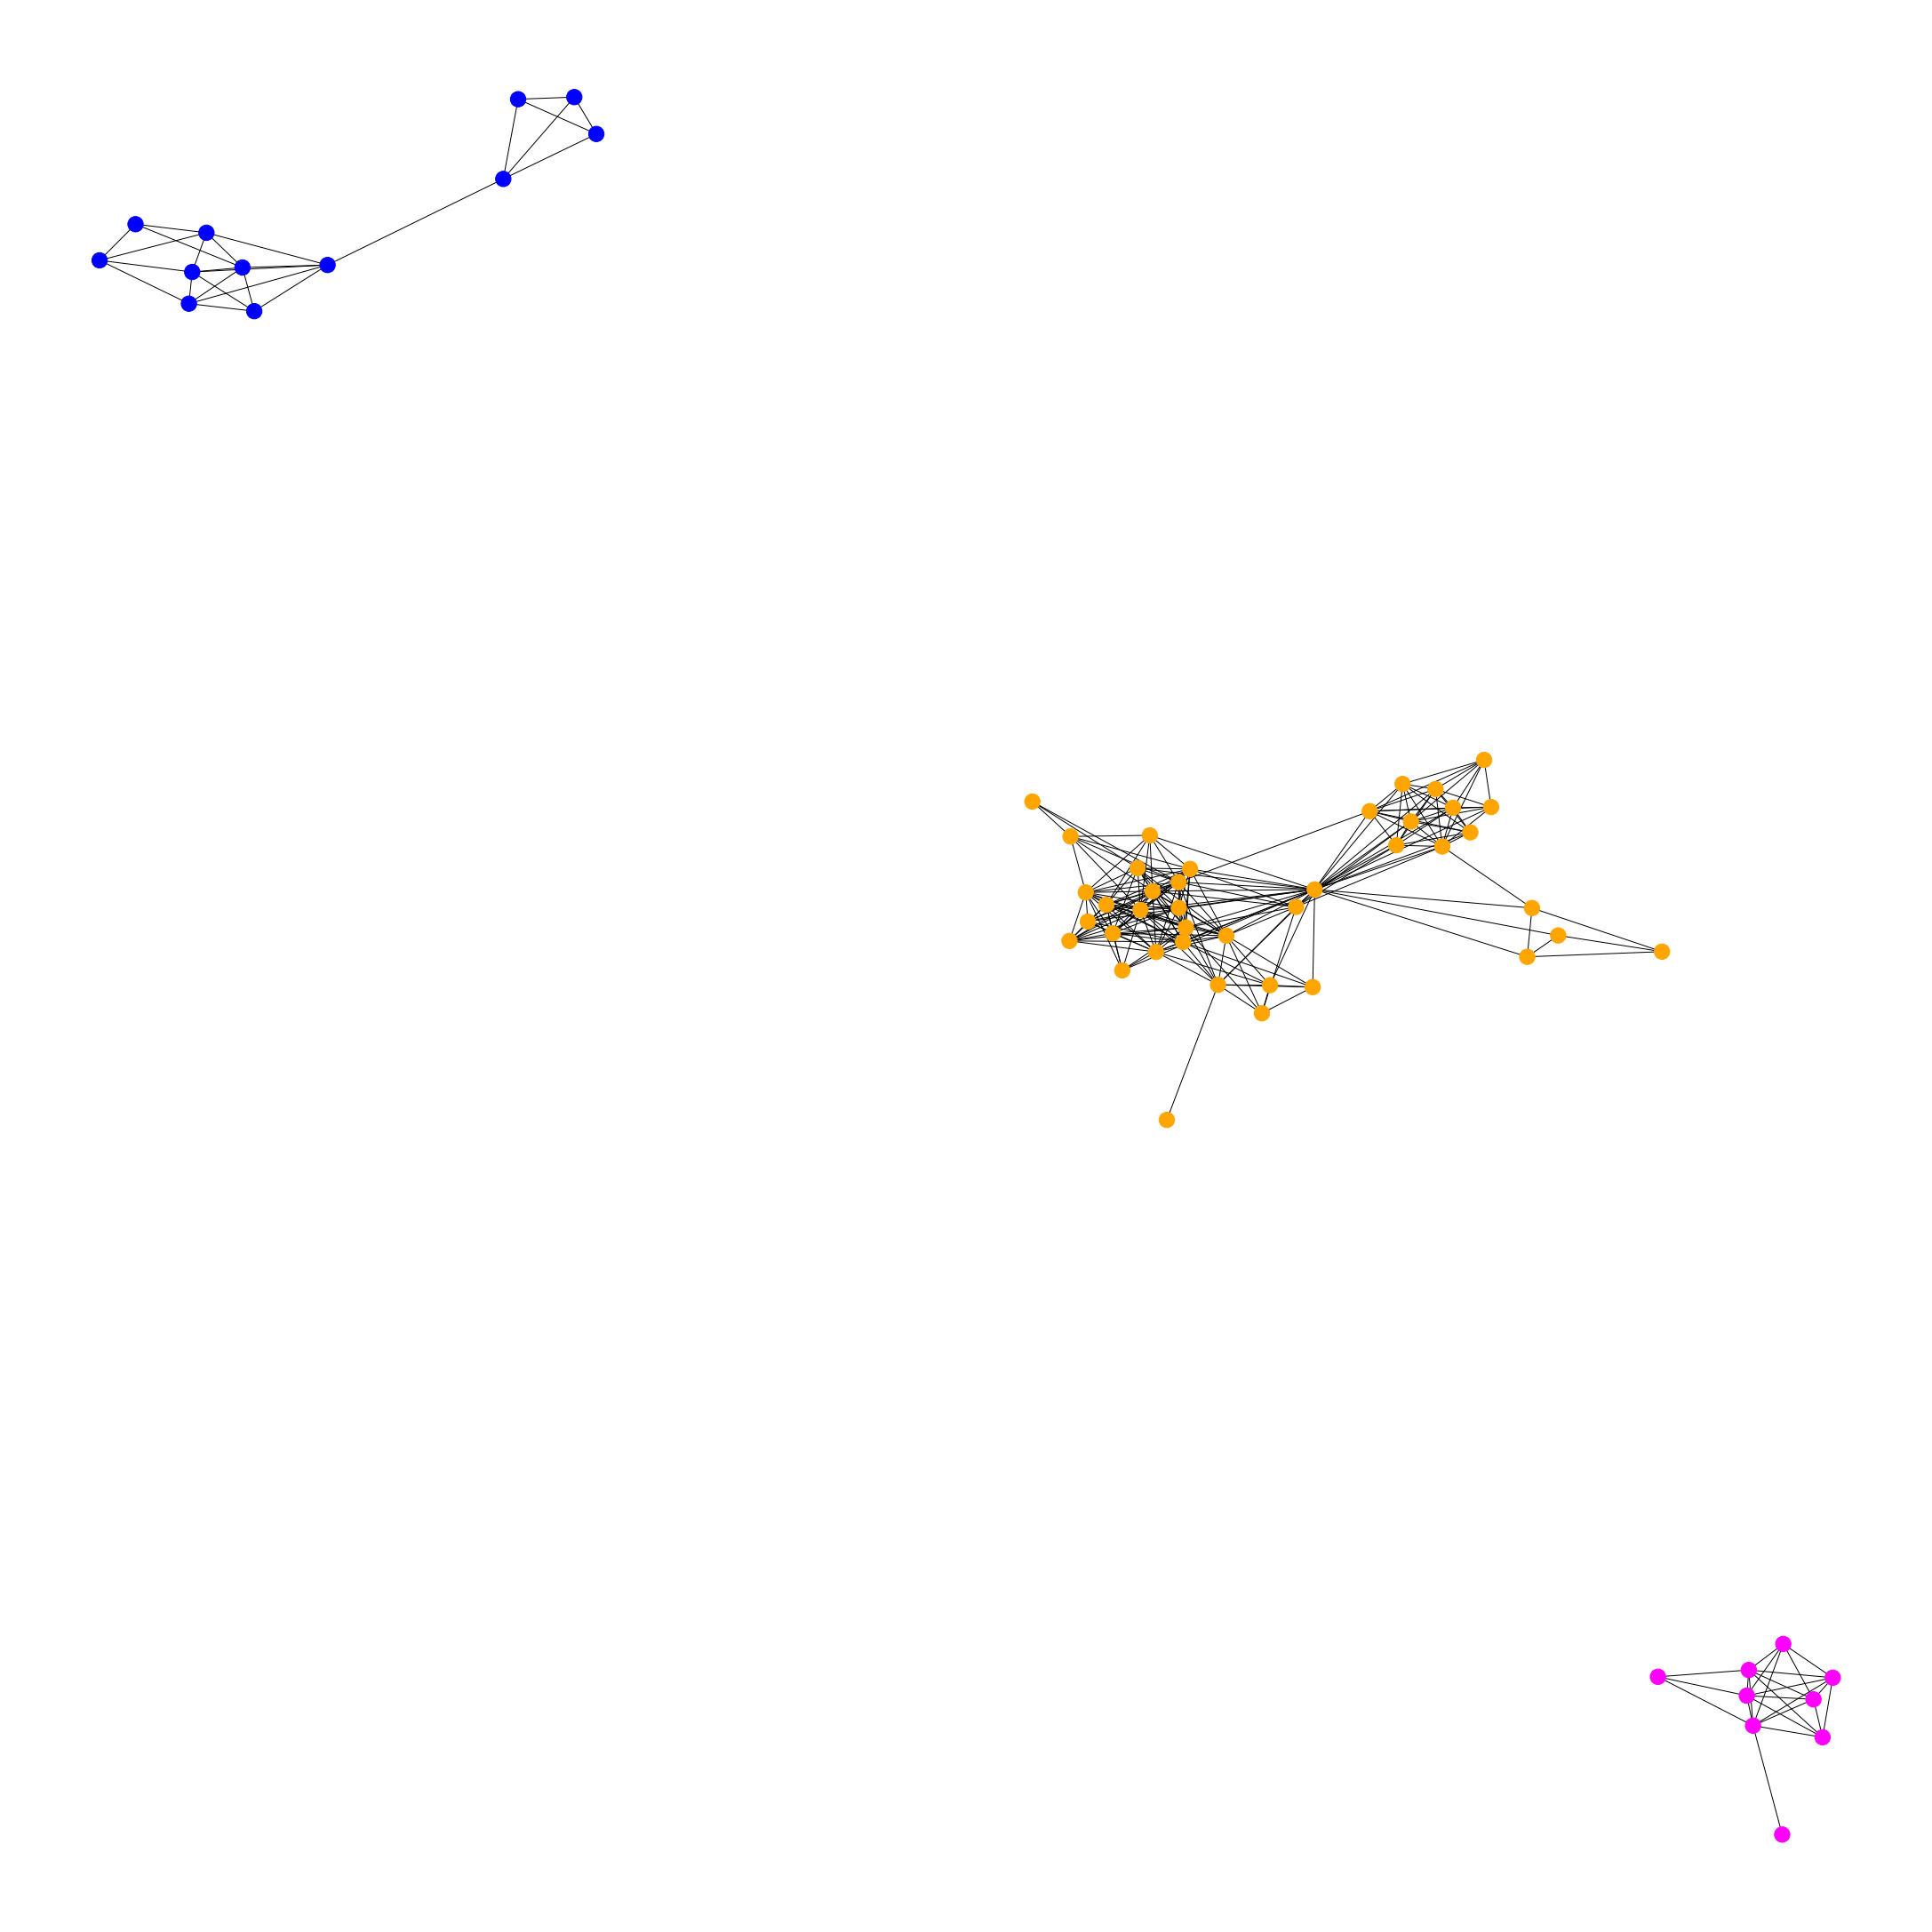

In [120]:
plt.figure(figsize=(30, 30))
nx.draw(G698, node_color=color_map(community_dict(communities698, G698), G698))

In [121]:
communities698 = list(nx.community.k_clique_communities(G698, 9))
np.array(communities698).shape

(2,)

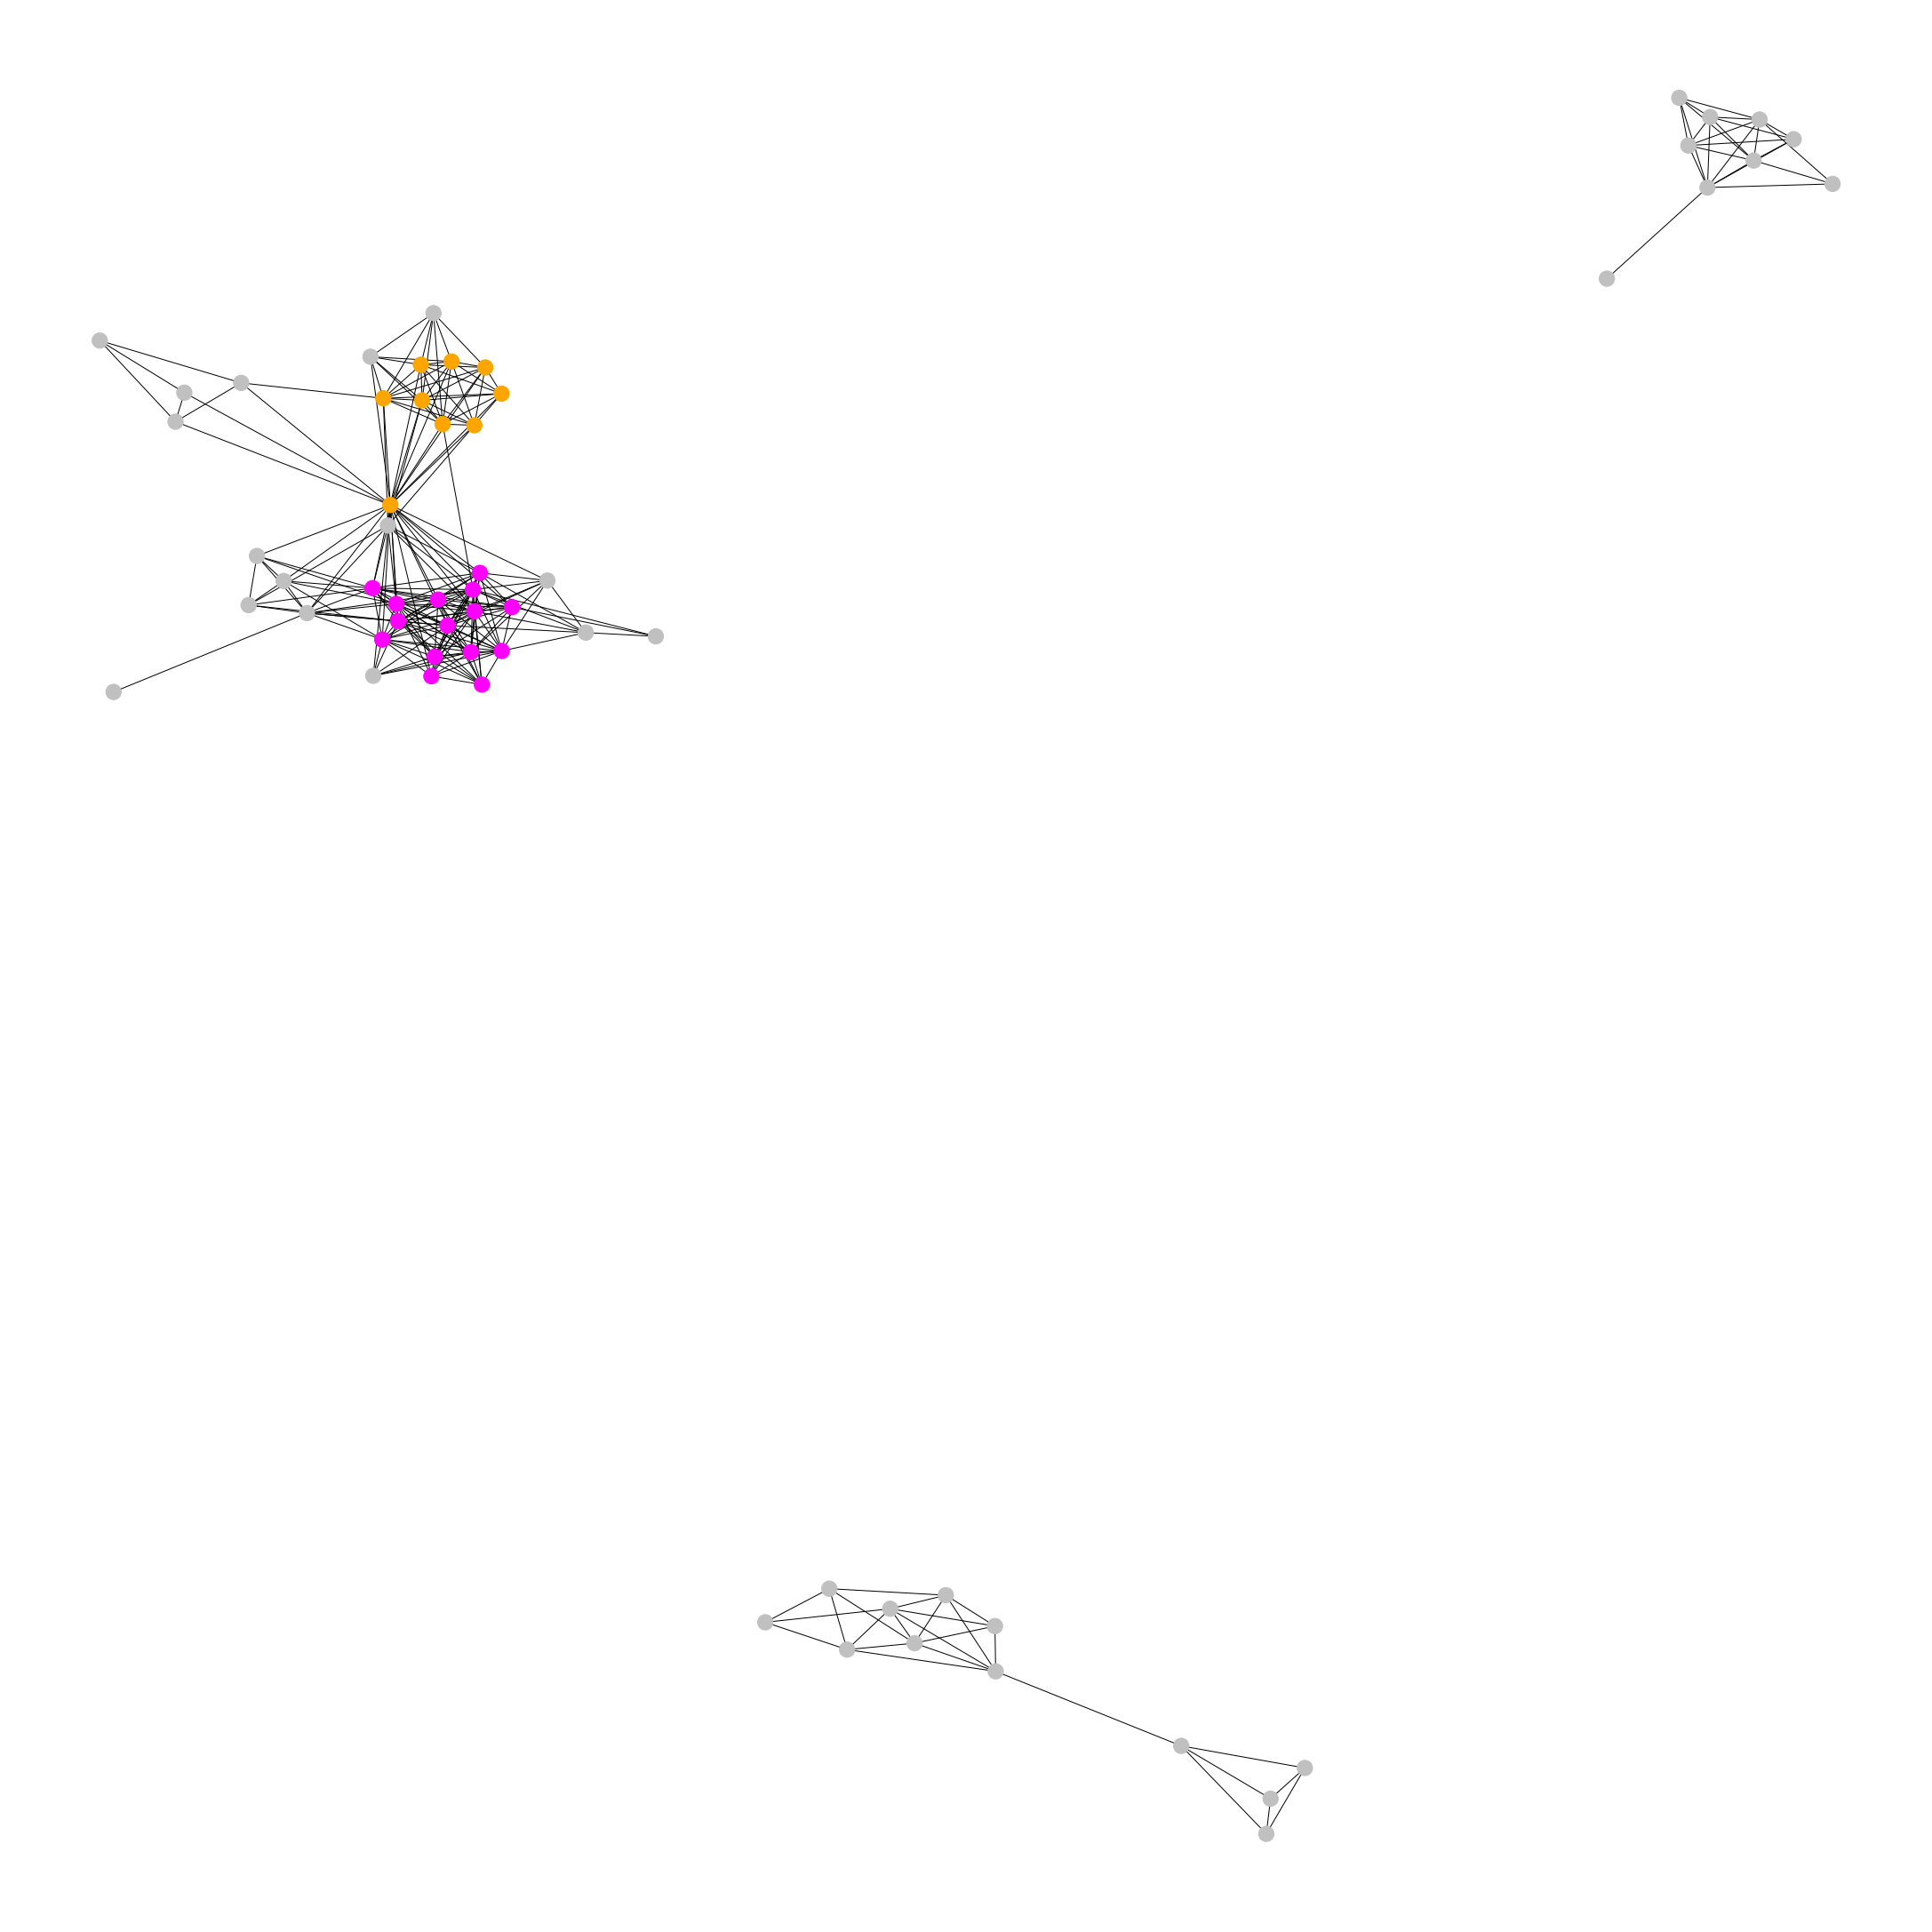

In [122]:
plt.figure(figsize=(30, 30))
nx.draw(G698, node_color=color_map(community_dict(communities698, G698), G698))

## Node 3437

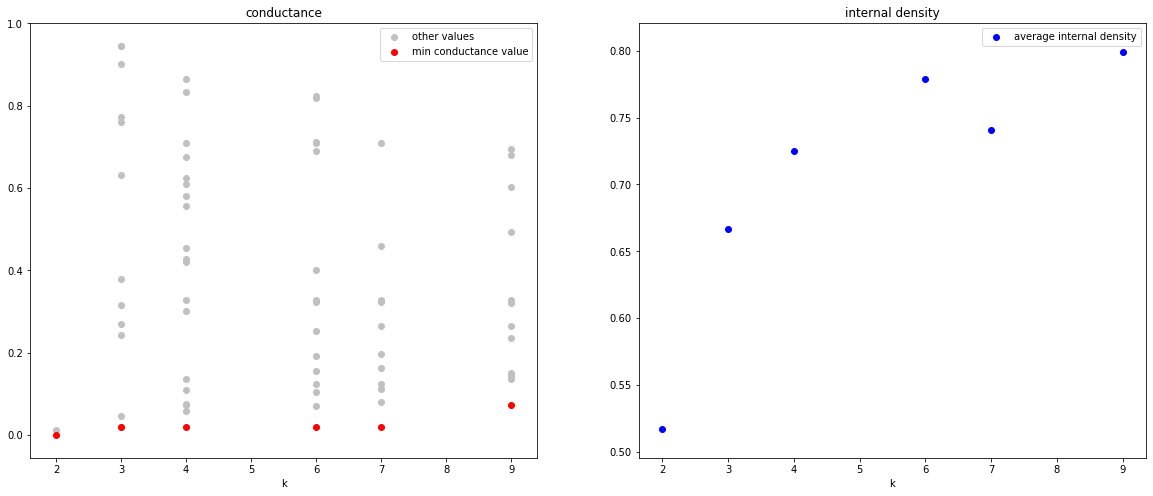

In [123]:
G3437 = graphs[8]
plot_eval(G3437)

In [124]:
communities3437 = list(nx.community.k_clique_communities(G3437, 2))
np.array(communities3437).shape

(2,)

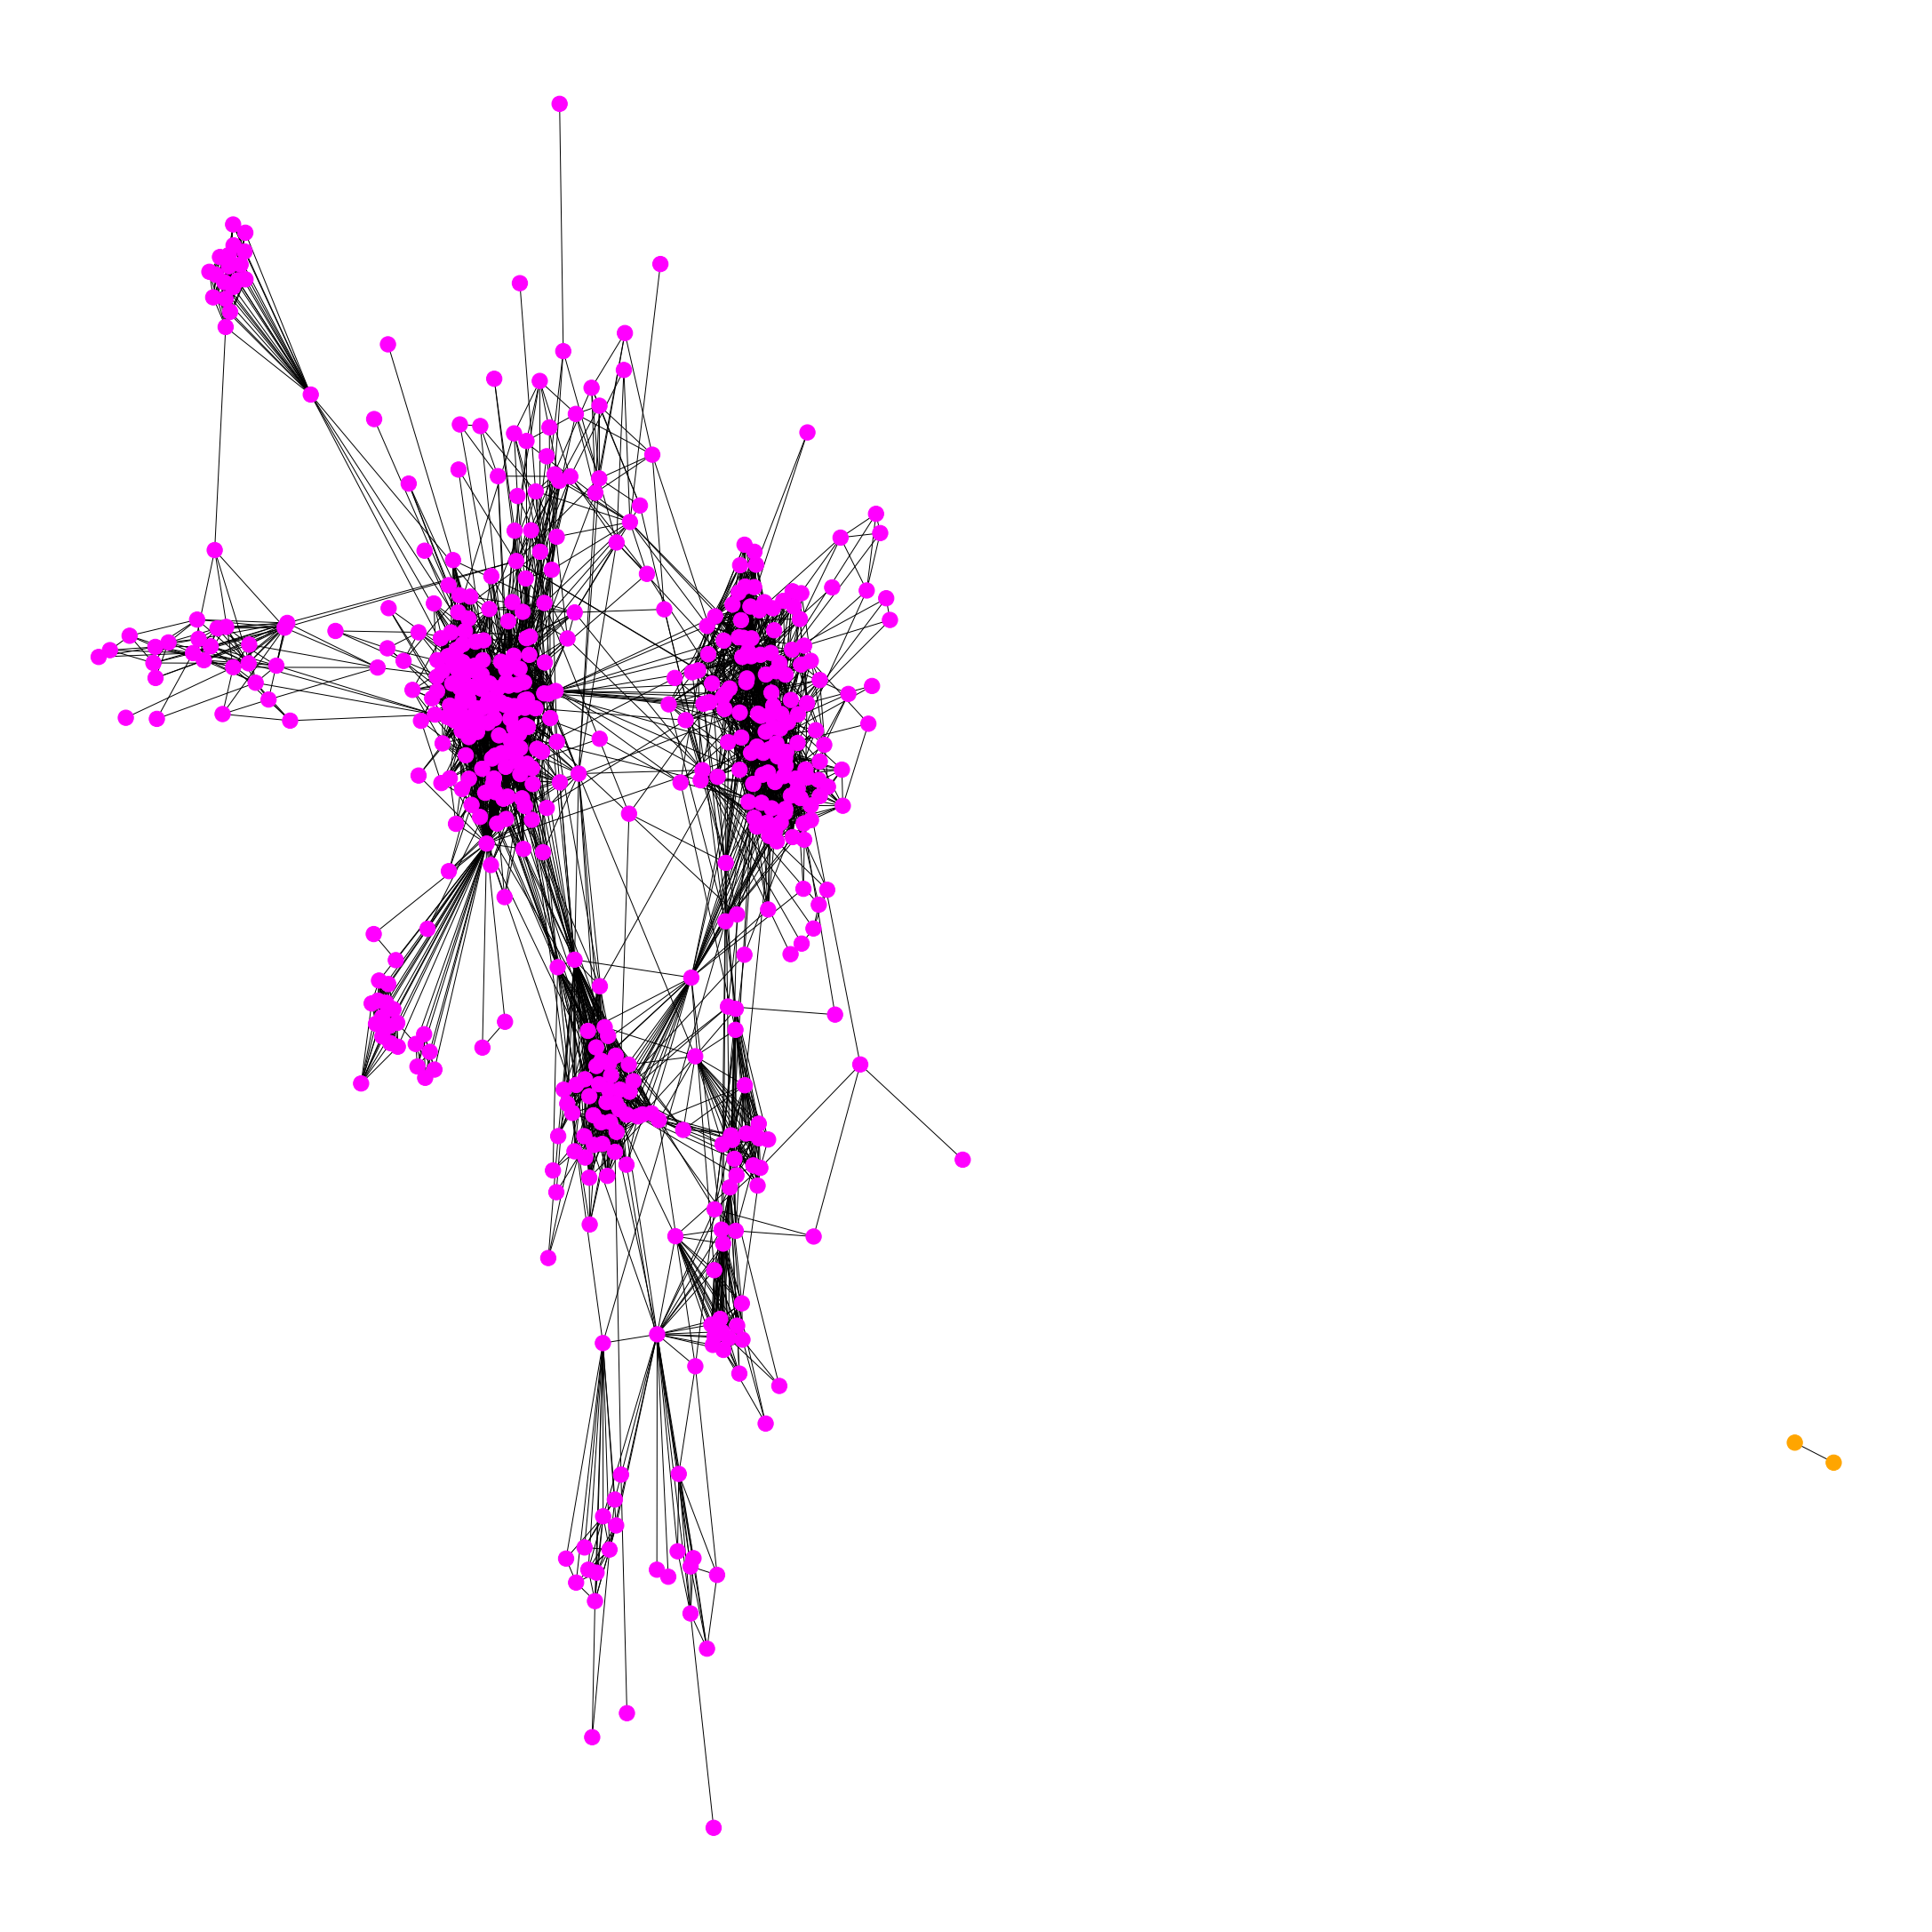

In [125]:
plt.figure(figsize=(30, 30))
nx.draw(G3437, node_color=color_map(community_dict(communities3437, G3437), G3437))

In [126]:
communities3437 = list(nx.community.k_clique_communities(G3437, 9))
np.array(communities3437).shape

(12,)

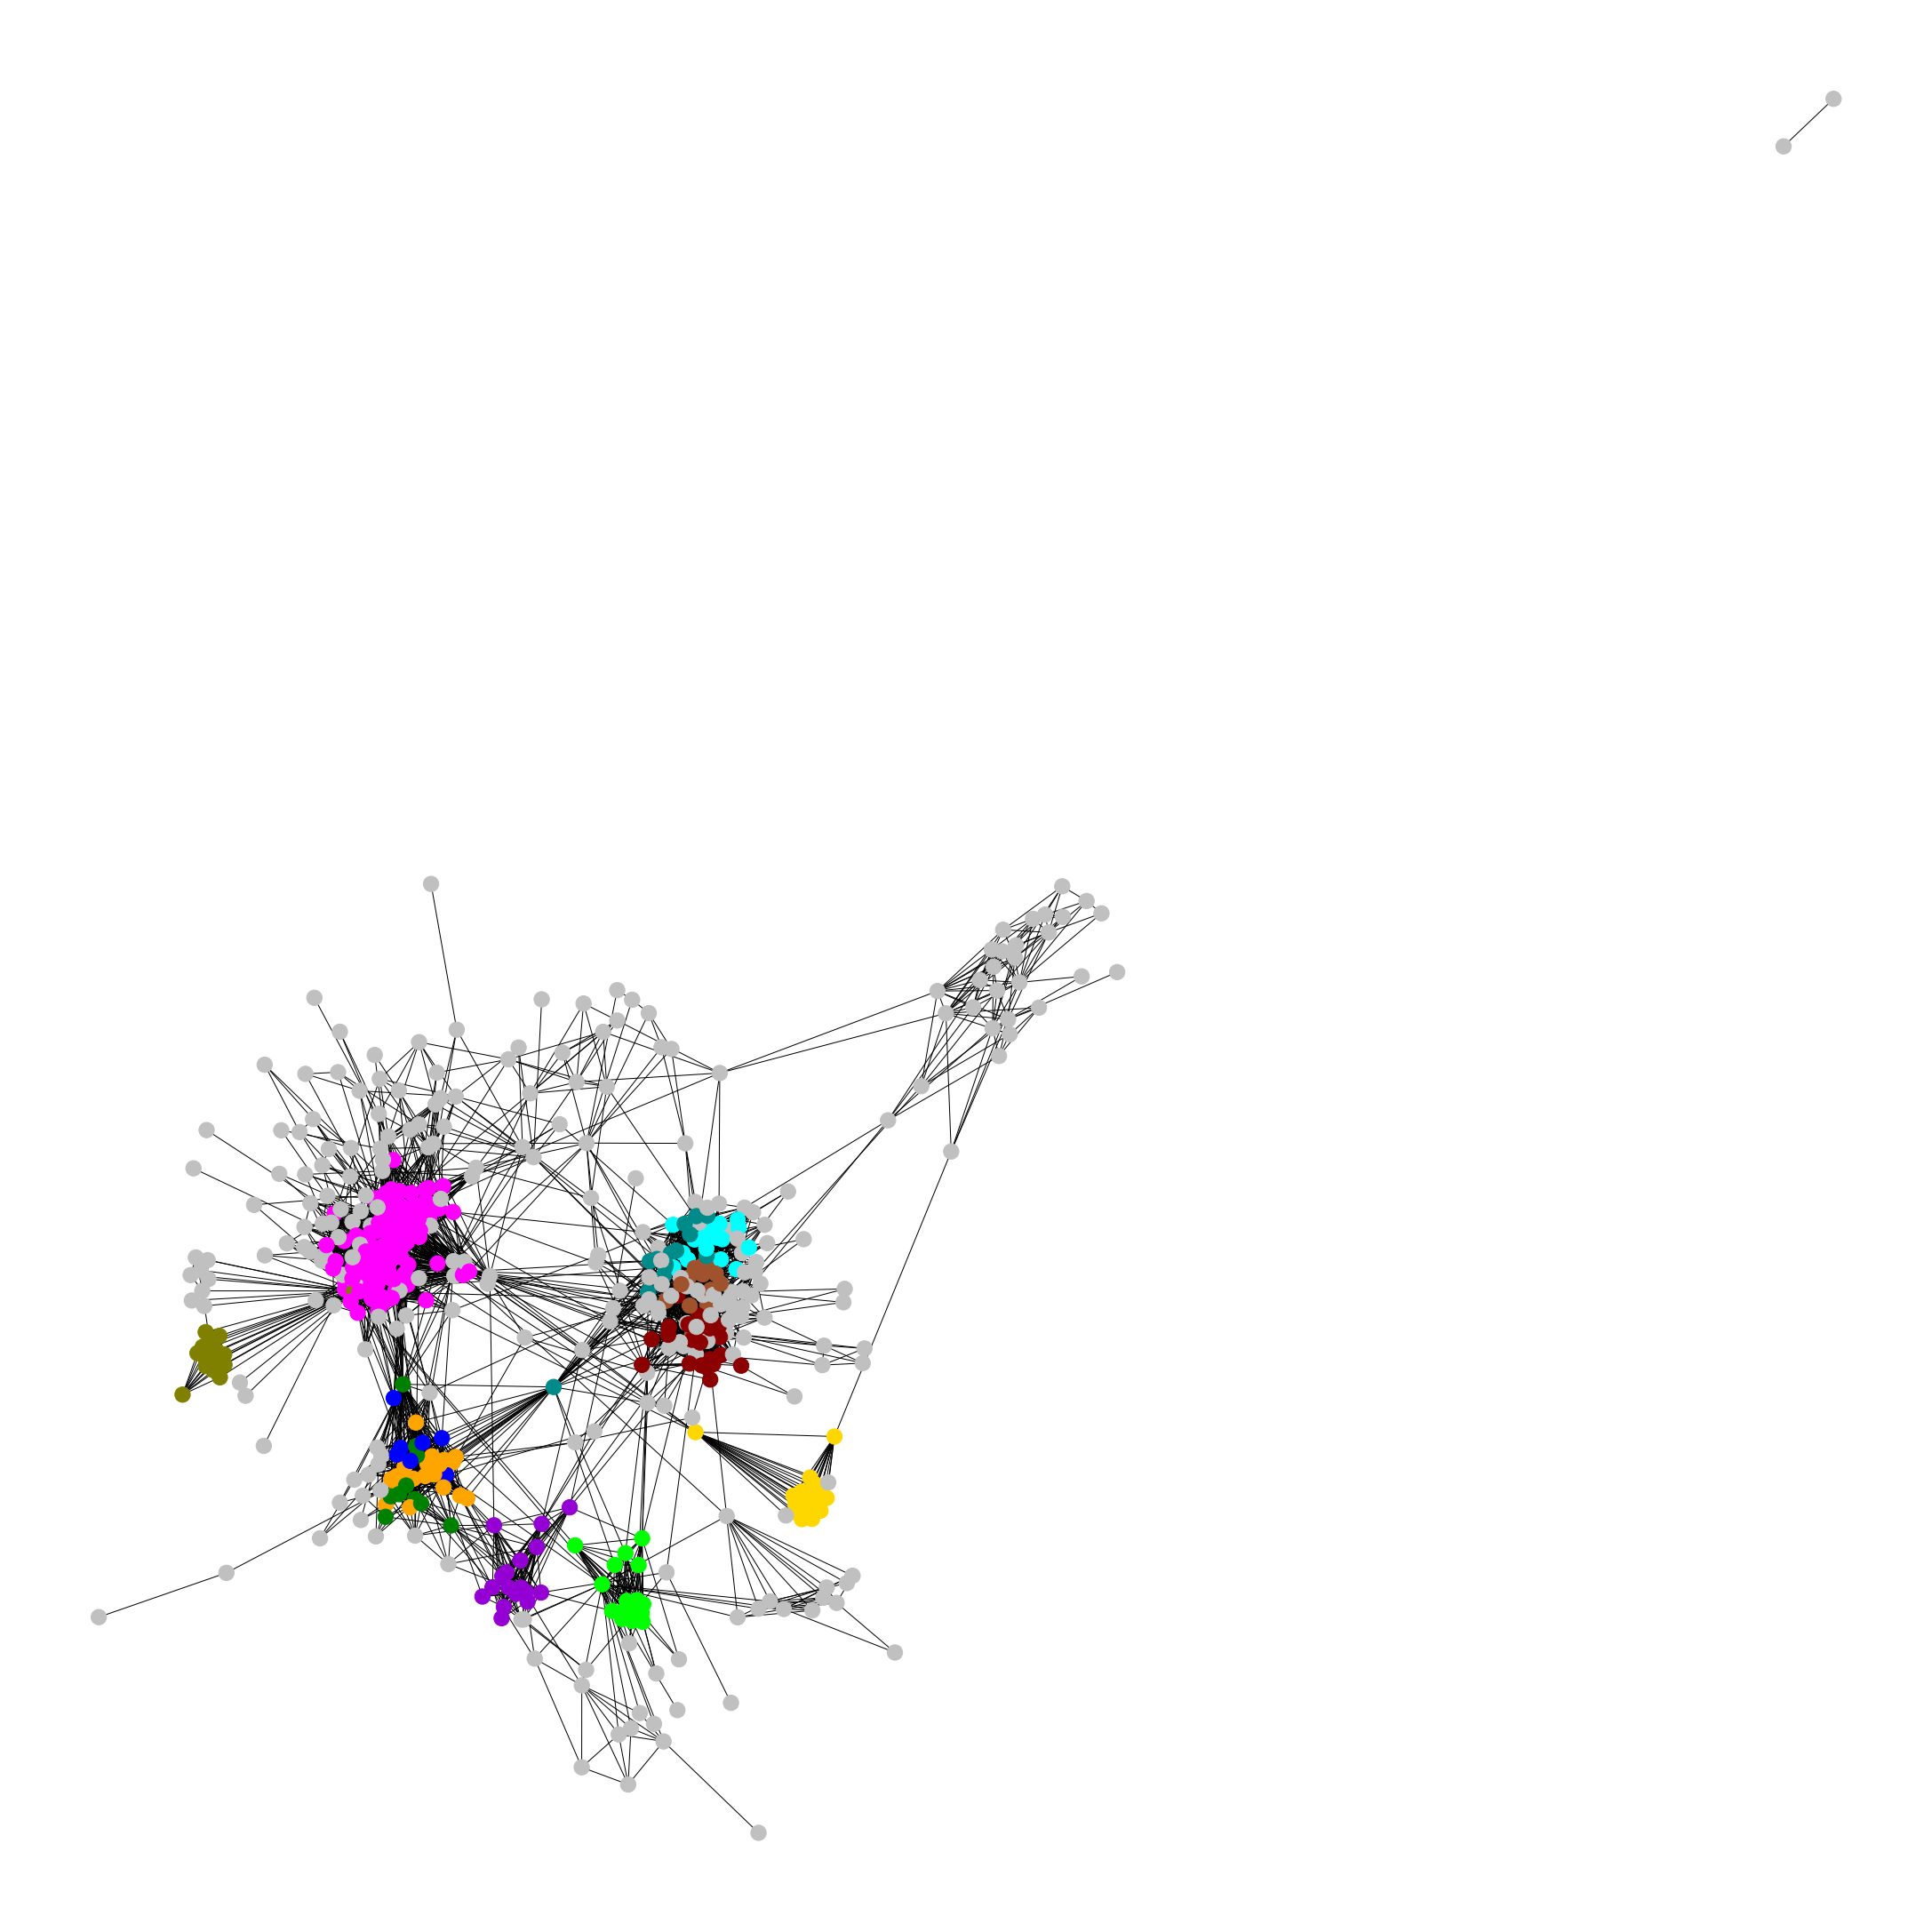

In [127]:
plt.figure(figsize=(30, 30))
nx.draw(G3437, node_color=color_map(community_dict(communities3437, G3437), G3437))

# Group-based community detection

In [129]:
partition = community_louvain.best_partition(G_total)
size = float(len(set(partition.values())))
size

39.0

In [130]:
c_map = []
for n in G_total:
    if n in partition:
        temp = partition[n]%len(COLORS)
        if temp == len(COLORS) - 1:
            temp = 0
        c_map.append(COLORS[temp])
    else:
        c_map.append(COLORS[-1])

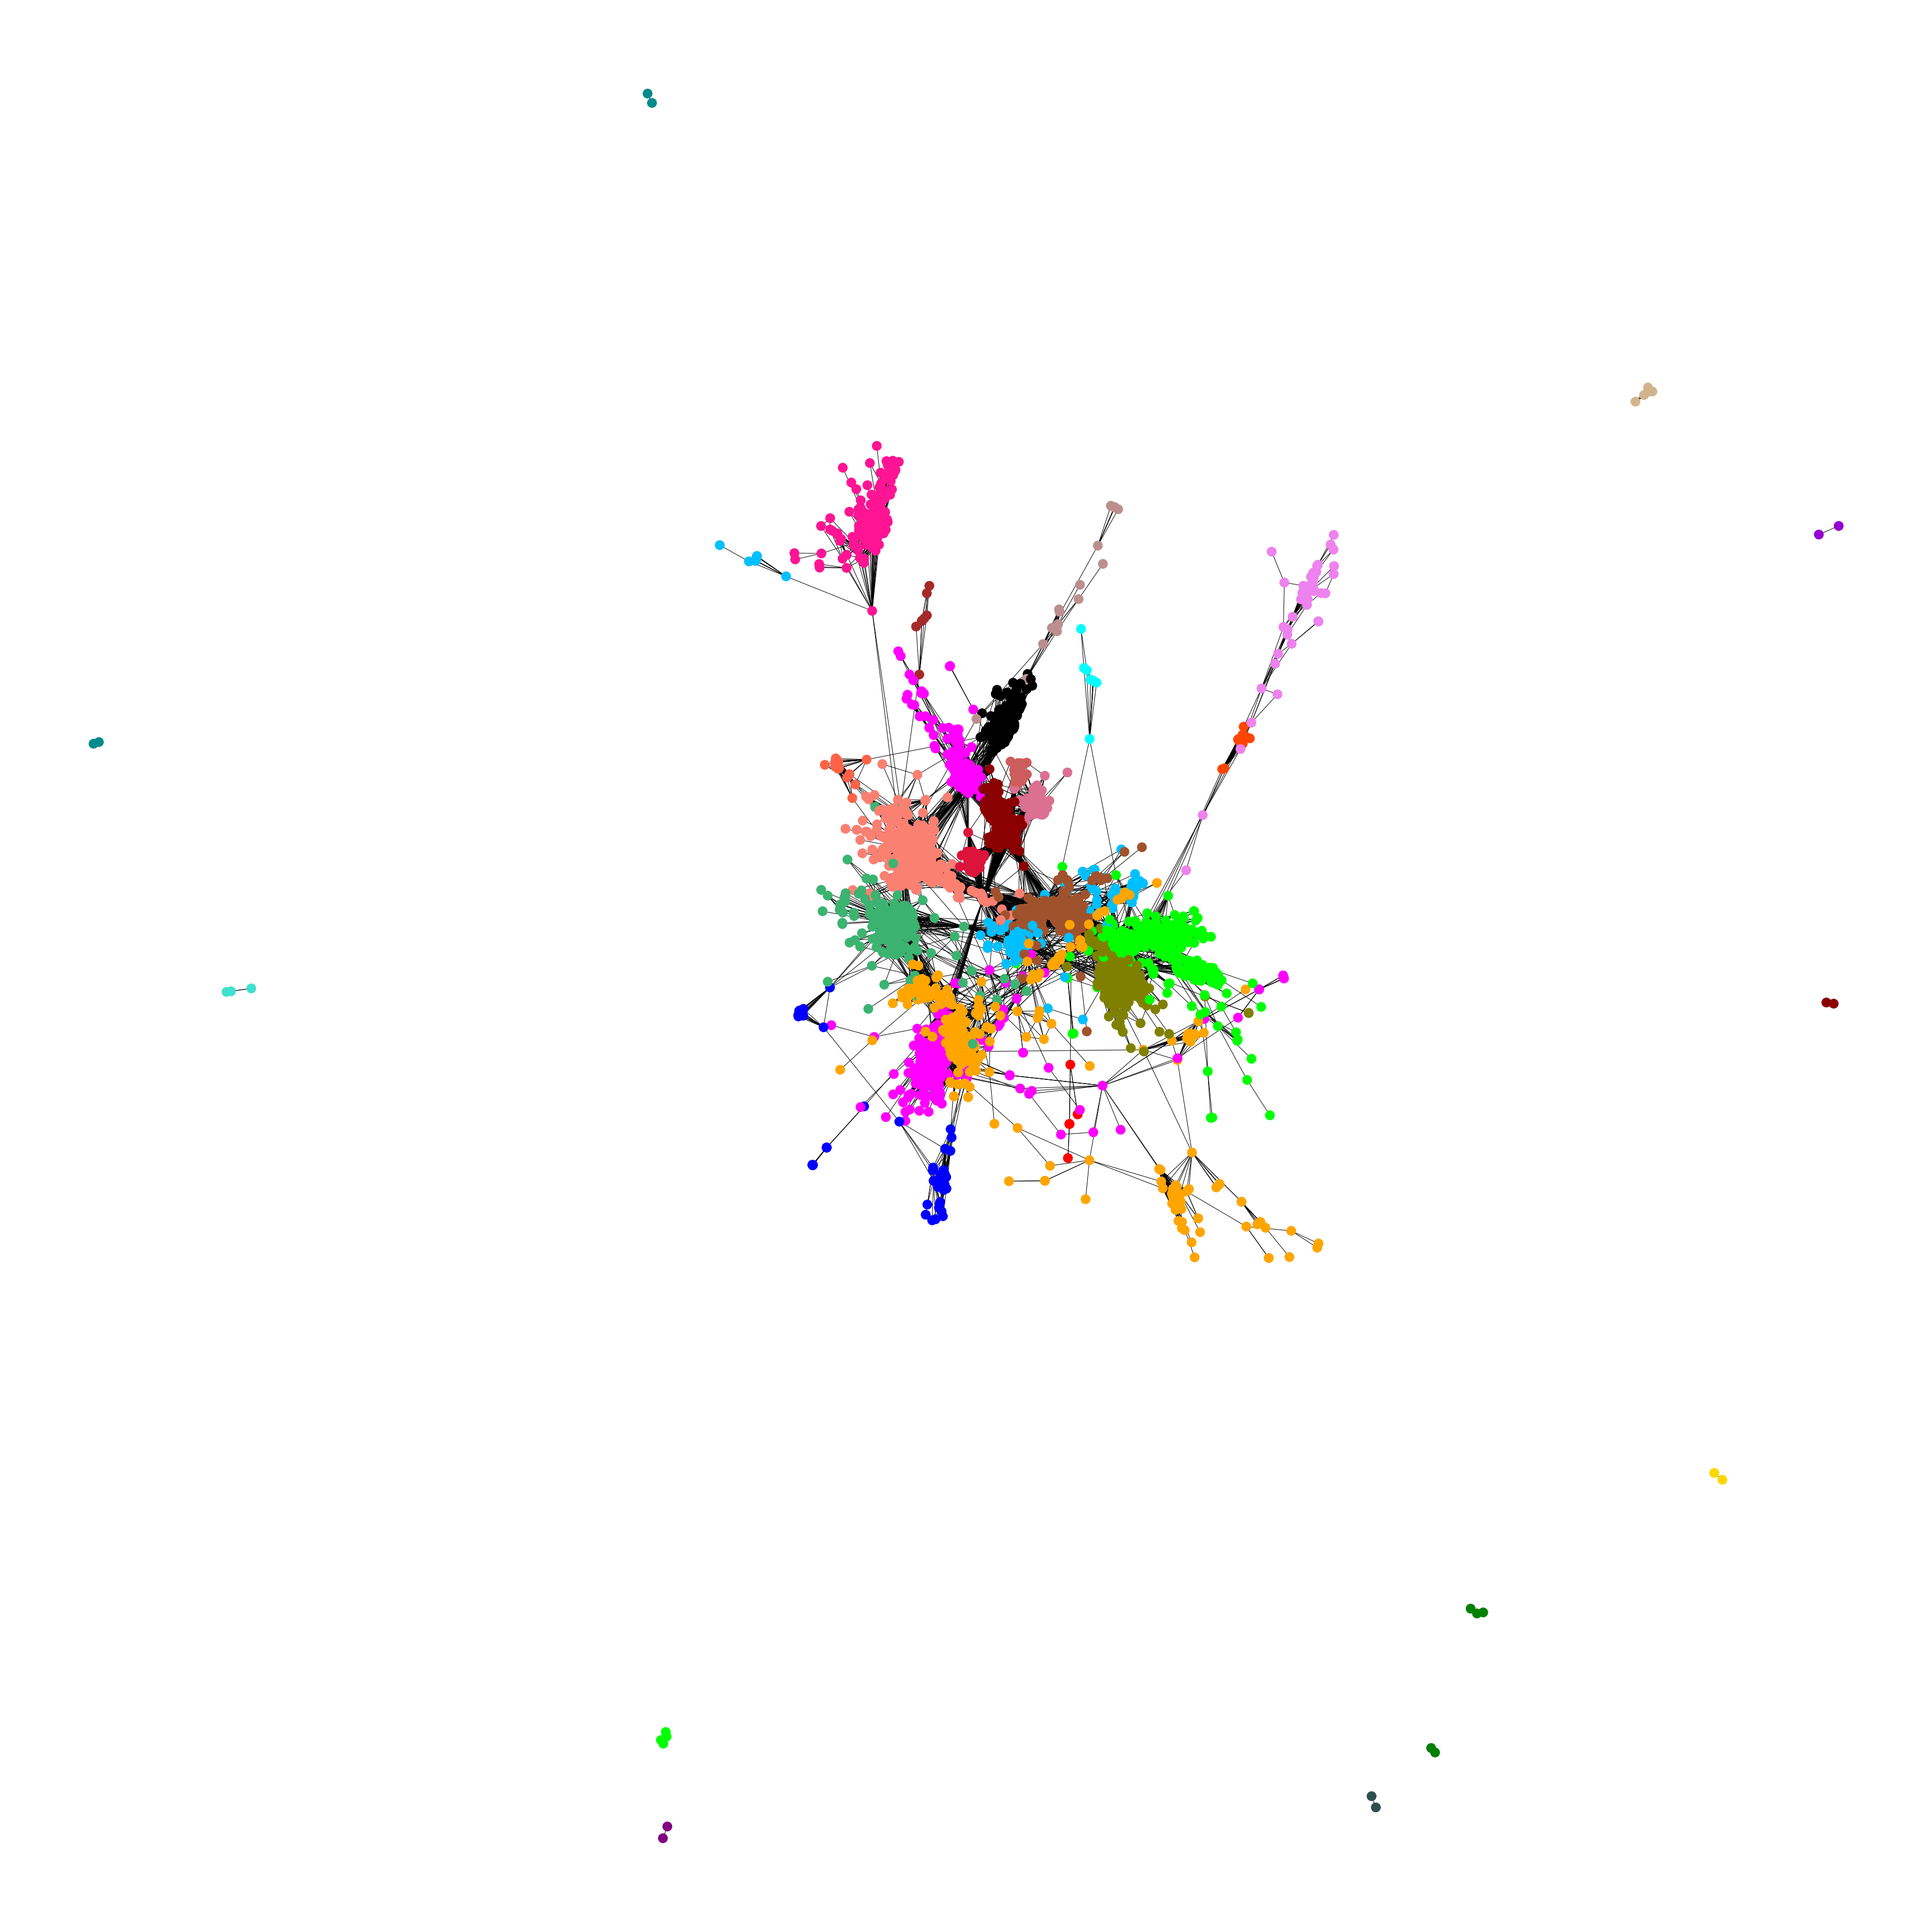

In [132]:
plt.figure(figsize=(50, 50))
nx.draw(G_total, node_color=c_map)

In [147]:
conds = []
ids = []
xs = []

for i in range(39):
    xs.append(i)
    nodes = [a for a, b in partition.items() if b == i]
    in_e = in_edges(nodes)
    out_e = out_edges(nodes)

    conds.append(conductance(in_e, out_e))
    ids.append(internal_density(in_e, len(nodes)))

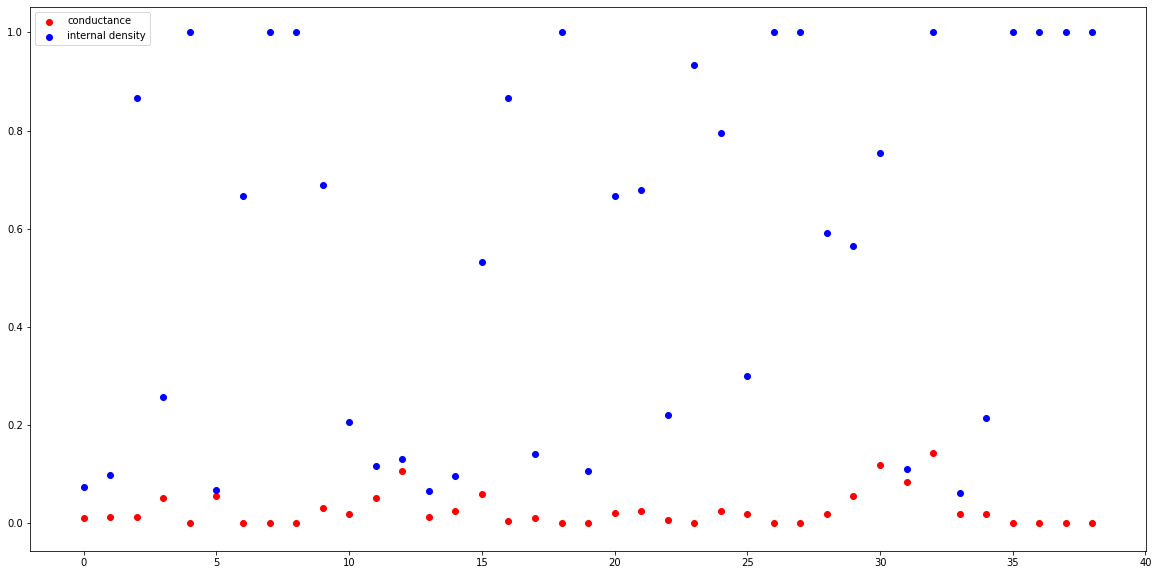

In [149]:
plt.figure(figsize=(20,10))
plt.scatter(xs, conds, label="conductance", c='r')
plt.scatter(xs, ids, label="internal density", c='b')
plt.legend()